___

QTW Case 6

#### Rick Fontenot
___


In [1]:
# Imports
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from datetime import date
import sklearn
pd.set_option("display.max_columns", None, "display.max_rows", None)
import missingno as msno


### Load the raw data


In [2]:
higgs=pd.read_csv("/Users/rickfontenot/Dropbox/SMU/DS7333 Quantifying World/QTW_Github/QTW/Case Study 6/data/all_train.csv")

higgs.head()

,# label,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,mass
0,1.0,-0.346368,0.416306,0.999236,0.475342,0.427493,-0.005984,1.989833,0.344530,1.566297,0.754261,2.269852,-1.300984,-1.199420,-1.161915,3.357043,0.460796,-0.404118,-0.815440,4.105282,0.267826,0.378718,1.743123,3.406367,4.350537,-0.352571,1.130032,2.227706,1000.0
1,1.0,1.708236,-0.319394,-1.241873,-0.887231,-0.871906,-0.005984,-0.001047,-1.038225,0.655748,0.754261,0.459217,-0.695640,0.359856,-1.161915,-0.502048,0.505149,-1.500441,1.226331,-1.178141,-0.877361,-1.483769,-0.573682,-1.693781,-0.545062,-0.299118,-0.662942,-0.193019,750.0
2,0.0,-0.360693,1.794174,0.264738,-0.472273,-0.292344,-1.054221,-1.150495,1.423404,1.270098,0.754261,-1.031239,1.912465,-1.321417,-1.161915,-0.406757,1.346497,-0.298099,1.226331,-1.199511,0.539020,-1.590629,-0.573682,-0.543636,-0.937456,-0.300344,-0.523262,-1.506304,750.0
3,1.0,-0.377914,-0.103932,-0.649434,-2.125015,-1.643797,-0.005984,1.011112,-1.040340,-0.541991,0.754261,1.142262,0.551081,1.016731,0.860649,0.454005,0.624624,1.439072,-0.815440,0.463763,-0.006583,1.089122,-0.573682,-0.276348,-0.409272,-0.349926,-0.307123,0.529698,1250.0
4,0.0,-0.067436,-0.636762,-0.620166,-0.062551,1.588715,-0.005984,-0.595304,-1.238987,0.336844,-1.325801,-0.181512,-1.329374,0.879087,0.860649,-0.143564,-1.293935,-1.222800,-0.815440,-0.552837,-1.418494,-0.562982,1.743123,0.881802,0.002516,1.560950,-0.150760,-1.023889,750.0


In [3]:
higgs.shape

(7000000, 29)

In [4]:
higgs.columns

Index(['# label', 'f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9',
       'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19',
       'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'mass'],
      dtype='object')

In [5]:
higgs = higgs.rename(columns={higgs.columns[0]: 'label'})
higgs['label'] = higgs['label'].apply(lambda x: round(x,))
higgs.head()

,label,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,mass
0,1,-0.346368,0.416306,0.999236,0.475342,0.427493,-0.005984,1.989833,0.344530,1.566297,0.754261,2.269852,-1.300984,-1.199420,-1.161915,3.357043,0.460796,-0.404118,-0.815440,4.105282,0.267826,0.378718,1.743123,3.406367,4.350537,-0.352571,1.130032,2.227706,1000.0
1,1,1.708236,-0.319394,-1.241873,-0.887231,-0.871906,-0.005984,-0.001047,-1.038225,0.655748,0.754261,0.459217,-0.695640,0.359856,-1.161915,-0.502048,0.505149,-1.500441,1.226331,-1.178141,-0.877361,-1.483769,-0.573682,-1.693781,-0.545062,-0.299118,-0.662942,-0.193019,750.0
2,0,-0.360693,1.794174,0.264738,-0.472273,-0.292344,-1.054221,-1.150495,1.423404,1.270098,0.754261,-1.031239,1.912465,-1.321417,-1.161915,-0.406757,1.346497,-0.298099,1.226331,-1.199511,0.539020,-1.590629,-0.573682,-0.543636,-0.937456,-0.300344,-0.523262,-1.506304,750.0
3,1,-0.377914,-0.103932,-0.649434,-2.125015,-1.643797,-0.005984,1.011112,-1.040340,-0.541991,0.754261,1.142262,0.551081,1.016731,0.860649,0.454005,0.624624,1.439072,-0.815440,0.463763,-0.006583,1.089122,-0.573682,-0.276348,-0.409272,-0.349926,-0.307123,0.529698,1250.0
4,0,-0.067436,-0.636762,-0.620166,-0.062551,1.588715,-0.005984,-0.595304,-1.238987,0.336844,-1.325801,-0.181512,-1.329374,0.879087,0.860649,-0.143564,-1.293935,-1.222800,-0.815440,-0.552837,-1.418494,-0.562982,1.743123,0.881802,0.002516,1.560950,-0.150760,-1.023889,750.0


In [176]:
higgs.label.groupby(higgs.label).count()


label
0    3499121
1    3500879
Name: label, dtype: int64

# 7 million records with 28 features plus target, and no missing values or duplicates

In [6]:
higgs.isna().sum()

label    0
f0       0
f1       0
f2       0
f3       0
f4       0
f5       0
f6       0
f7       0
f8       0
f9       0
f10      0
f11      0
f12      0
f13      0
f14      0
f15      0
f16      0
f17      0
f18      0
f19      0
f20      0
f21      0
f22      0
f23      0
f24      0
f25      0
f26      0
mass     0
dtype: int64

In [7]:
# Check for duplicate rows
print('Duplicate rows: ',higgs.duplicated(keep='first').sum())

Duplicate rows:  0


/var/folders/9j/md1p5ld92510j4f_fk49qf300000gn/T/ipykernel_1473/855766858.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


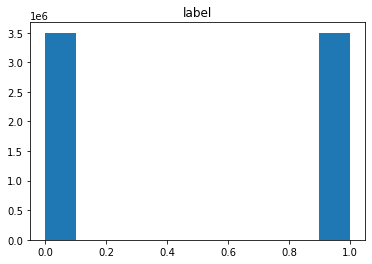

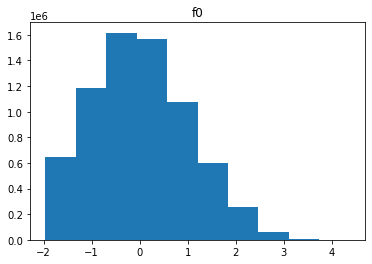

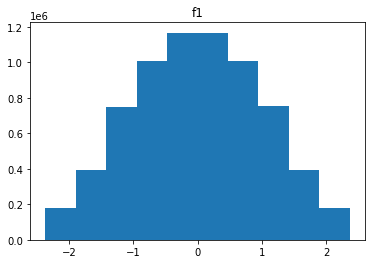

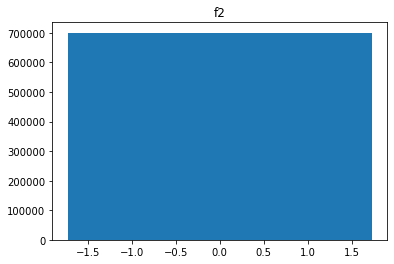

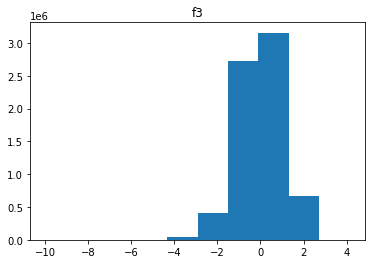

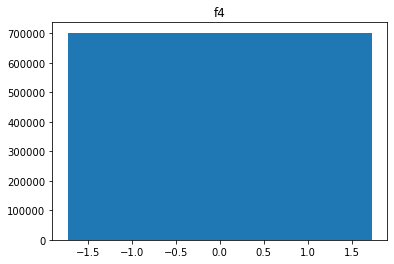

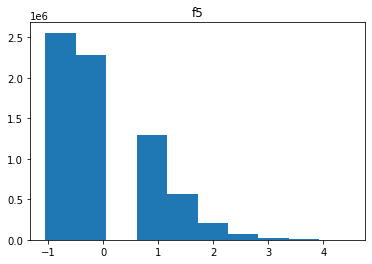

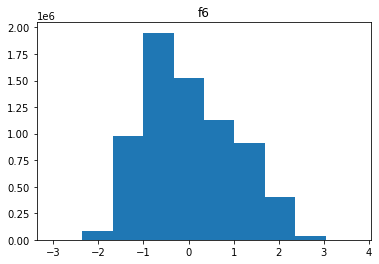

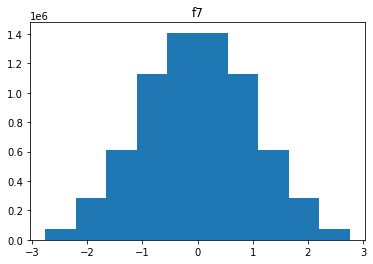

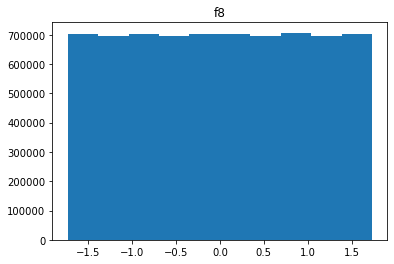

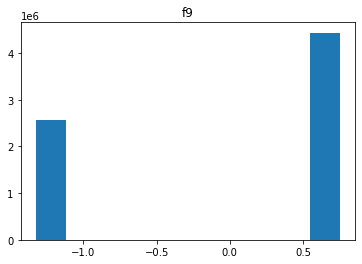

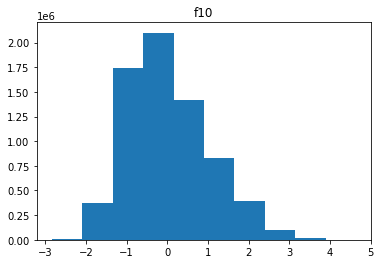

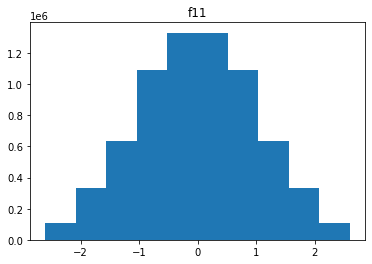

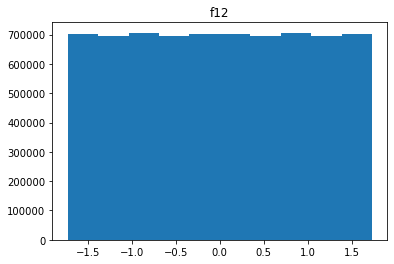

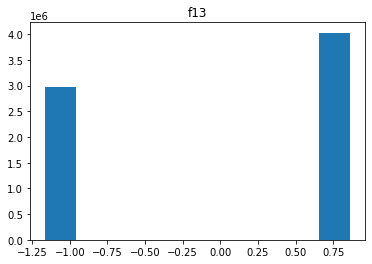

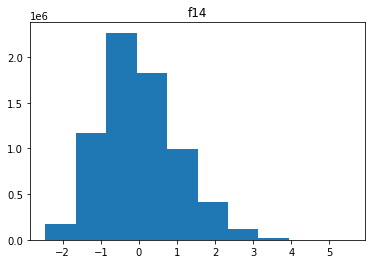

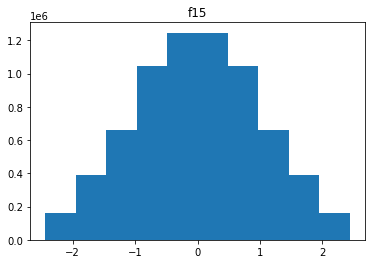

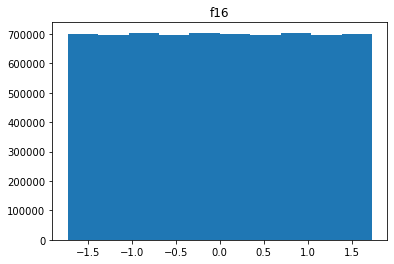

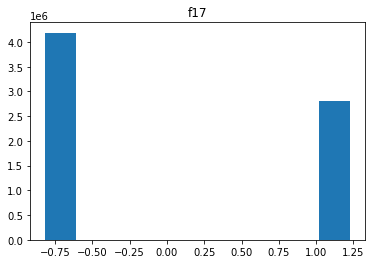

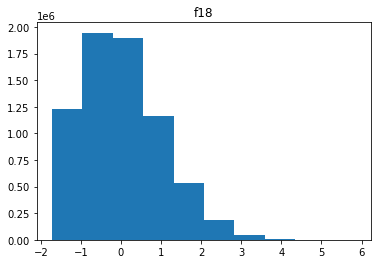

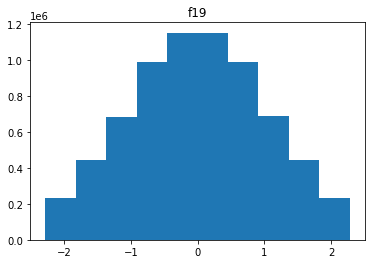

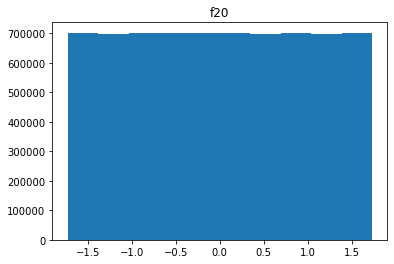

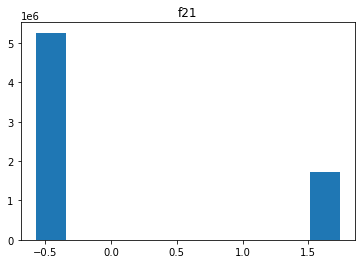

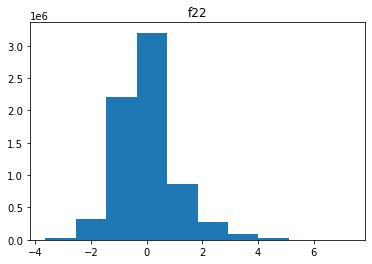

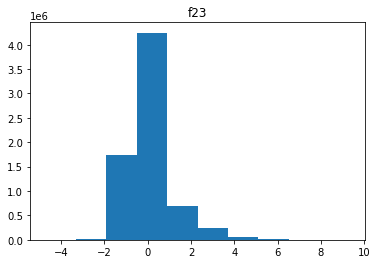

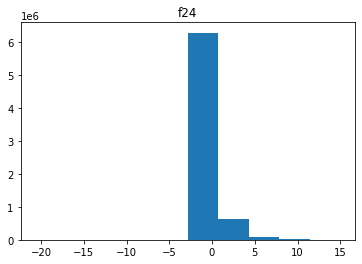

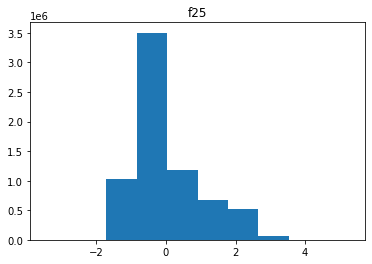

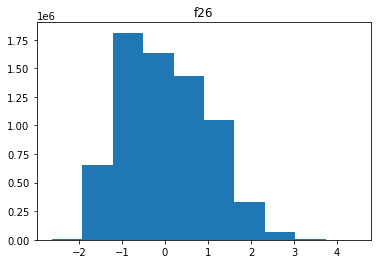

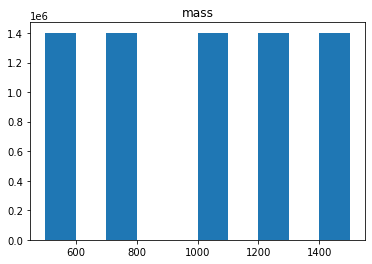

In [8]:
for i in higgs.columns:    
    plt.figure()
    plt.title(f'{i}')
    plt.hist(higgs[i])

In [9]:
higgs.describe()

,label,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,mass
count,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06
mean,5.001256e-01,1.612528e-02,4.770022e-04,2.686578e-05,1.056081e-02,-1.050026e-04,2.765919e-03,1.815953e-02,2.510948e-05,4.345870e-04,-6.869956e-03,1.754267e-02,-1.610605e-04,-3.289412e-04,1.738506e-03,1.724634e-02,4.830252e-04,-5.536178e-04,4.960189e-03,1.164789e-02,-1.127097e-04,7.686731e-05,2.909202e-04,1.228774e-02,9.778378e-03,5.269844e-03,-1.760961e-03,1.533136e-02,1.000107e+03
std,5.000000e-01,1.004417e+00,9.974864e-01,1.000080e+00,9.956003e-01,9.998670e-01,1.000957e+00,9.867746e-01,9.965867e-01,1.000007e+00,1.001938e+00,9.941511e-01,9.984497e-01,1.000078e+00,9.997368e-01,9.994654e-01,9.984289e-01,9.998608e-01,1.001006e+00,1.002725e+00,1.000038e+00,1.000033e+00,1.000170e+00,1.010477e+00,1.005418e+00,1.009990e+00,9.844511e-01,9.822799e-01,3.534255e+02
min,0.000000e+00,-1.960549e+00,-2.365355e+00,-1.732165e+00,-9.980274e+00,-1.732137e+00,-1.054221e+00,-3.034787e+00,-2.757853e+00,-1.732359e+00,-1.325801e+00,-2.835563e+00,-2.602091e+00,-1.732216e+00,-1.161915e+00,-2.454879e+00,-2.437812e+00,-1.732145e+00,-8.154401e-01,-1.728284e+00,-2.281867e+00,-1.731758e+00,-5.736825e-01,-3.631608e+00,-4.729473e+00,-2.062223e+01,-3.452634e+00,-2.632761e+00,5.000000e+02
25%,0.000000e+00,-7.288206e-01,-7.332548e-01,-8.656704e-01,-6.092291e-01,-8.658025e-01,-1.054221e+00,-7.566092e-01,-7.014146e-01,-8.656543e-01,-1.325801e+00,-7.237266e-01,-7.032926e-01,-8.665987e-01,-1.161915e+00,-6.996179e-01,-7.070255e-01,-8.662470e-01,-8.154401e-01,-7.423630e-01,-7.206846e-01,-8.656855e-01,-5.736825e-01,-5.417942e-01,-5.115522e-01,-3.543870e-01,-6.925097e-01,-7.943804e-01,7.500000e+02
50%,1.000000e+00,-3.930319e-02,8.523957e-04,3.199154e-04,1.963316e-02,-5.070131e-04,-5.983562e-03,-1.499527e-01,-1.067553e-04,1.384781e-03,7.542607e-01,-1.285732e-01,-5.755420e-04,-1.282098e-03,8.606486e-01,-9.749269e-02,2.975658e-04,-1.376716e-03,-8.154401e-01,-8.992496e-02,-6.735953e-05,-4.424527e-04,-5.736825e-01,-1.602760e-01,-3.144032e-01,-3.265228e-01,-3.570301e-01,-8.828640e-02,1.000000e+03
75%,1.000000e+00,6.900799e-01,7.347832e-01,8.659464e-01,6.798818e-01,8.657646e-01,8.504885e-01,7.686690e-01,7.013194e-01,8.665976e-01,7.542607e-01,6.478635e-01,7.041004e-01,8.658323e-01,8.606486e-01,6.347052e-01,7.083709e-01,8.649424e-01,1.226331e+00,6.423185e-01,7.204921e-01,8.659566e-01,-5.736825e-01,4.812194e-01,1.634892e-01,-2.337671e-01,4.753128e-01,7.610846e-01,1.250000e+03
max,1.000000e+00,4.378282e+00,2.365287e+00,1.732370e+00,4.148023e+00,1.731978e+00,4.482618e+00,3.720345e+00,2.758590e+00,1.731450e+00,7.542607e-01,4.639335e+00,2.602294e+00,1.732007e+00,8.606486e-01,5.535799e+00,2.438369e+00,1.732738e+00,1.226331e+00,5.866367e+00,2.282217e+00,1.732740e+00,1.743123e+00,7.293420e+00,9.333287e+00,1.499064e+01,5.277313e+00,4.444690e+00,1.500000e+03


In [10]:
higgs.columns

Index(['label', 'f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9',
       'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19',
       'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'mass'],
      dtype='object')

In [7]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, holdback_index in split.split(higgs, higgs.label):
    training_df = higgs.iloc[train_index]
    holdback_df = higgs.iloc[holdback_index]


In [8]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=42)
for validation_index, test_index in split.split(holdback_df, holdback_df.label):
    validation_df = holdback_df.iloc[validation_index]
    test_df = holdback_df.iloc[test_index]

print("Size of training set: ",training_df.shape)
print("Size of validation set: ",validation_df.shape)
print("Size of test set: ",test_df.shape)

Size of training set:  (5600000, 29)
Size of validation set:  (700000, 29)
Size of test set:  (700000, 29)


In [9]:
train_features = training_df.drop(['label'],axis=1).values #droping target
train_labels = training_df['label'].values

validation_features = validation_df.drop(['label'],axis=1).values #droping target
validation_labels = validation_df['label'].values

test_features = test_df.drop(['label'],axis=1).values #droping target
test_labels = test_df['label'].values



## Scale Features

In [44]:
train_features

array([[-1.57687044e+00, -1.53194678e+00, -1.36175871e-01, ...,
         1.81841409e+00,  9.93695080e-01,  4.99999969e+02],
       [-1.09753646e-01, -2.56410807e-01,  1.17758490e-01, ...,
        -6.77254975e-01, -1.30519986e+00,  1.25000000e+03],
       [ 1.76545846e+00, -2.17874026e+00, -3.96287024e-01, ...,
        -7.21605003e-01, -7.03450516e-02,  7.50000000e+02],
       ...,
       [ 5.35067737e-01, -6.91768885e-01, -1.68381310e+00, ...,
         1.37669957e+00,  7.15924919e-01,  1.00000000e+03],
       [-3.87337863e-01, -9.21249926e-01, -6.11122847e-01, ...,
        -1.13498032e+00, -1.57653105e+00,  4.99999969e+02],
       [-8.35407794e-01, -4.54731107e-01, -1.93680413e-02, ...,
        -6.45789087e-01, -1.07263637e+00,  1.25000000e+03]])

In [177]:
#Scale new predictor matrix
from sklearn.preprocessing import StandardScaler
scl_obj = StandardScaler()
scl_obj.fit(train_features)
train_features_scaled = scl_obj.transform(train_features)
scl_obj.fit(validation_features)
validation_features_scaled = scl_obj.transform(validation_features)
scl_obj.fit(test_features)
test_features_scaled = scl_obj.transform(test_features)

In [178]:
train_features_scaled

array([[-1.58589070e+00, -1.53586705e+00, -1.36540050e-01, ...,
         1.84851539e+00,  9.96181723e-01, -1.41469037e+00],
       [-1.25217096e-01, -2.57340172e-01,  1.17408099e-01, ...,
        -6.86327047e-01, -1.34413448e+00,  7.07460940e-01],
       [ 1.74175957e+00, -2.18417716e+00, -3.96665327e-01, ...,
        -7.31373217e-01, -8.70301789e-02, -7.07306544e-01],
       ...,
       [ 5.16772400e-01, -6.93719089e-01, -1.68426131e+00, ...,
         1.39986748e+00,  7.13406726e-01,  7.71978648e-05],
       [-4.01582236e-01, -9.23738223e-01, -6.11512815e-01, ...,
        -1.15123710e+00, -1.62035449e+00, -1.41469037e+00],
       [-8.47684360e-01, -4.56125498e-01, -1.97258785e-02, ...,
        -6.54367254e-01, -1.10738068e+00,  7.07460940e-01]])

# Start with a random forest classifier as benchmark

In [147]:
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score


scorer = {
    'accuracy': make_scorer(accuracy_score),
    'recall': make_scorer(recall_score),
    'precision': make_scorer(precision_score)
}

In [151]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=5, n_estimators=50)

training_model = rf.fit(train_features_scaled,train_labels)

rf_test_predictions = training_model.predict(test_features_scaled)
print("Test Set Accuracy: ", accuracy_score(test_labels, rf_test_predictions))



Test Set Accuracy:  0.8240114285714286


In [10]:
# TensorFlow and tf.keras
import tensorflow as tf

print(tf.__version__)

2.8.0


In [ ]:
tf.random.set_seed(1234)


In [141]:
simple_model = tf.keras.Sequential([
    tf.keras.layers.Dense(300, activation='relu', input_shape=(28,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
    
])

In [142]:
simple_model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[tf.keras.metrics.AUC(name='AUC'),'accuracy'])

In [143]:
#Add early stopping
callback = tf.keras.callbacks.ReduceLROnPlateau(
  monitor='val_loss', factor=0.1, patience=10,
  mode='auto', min_delta=0.0001, cooldown=0, min_lr=0,
)

In [144]:
train_labels.shape

(5600000,)

In [145]:
history = simple_model.fit(train_features_scaled, train_labels, batch_size=5000, epochs=5)


Epoch 1/5


/Users/rickfontenot/miniforge3/envs/mlp/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
2022-03-27 08:23:07.680914: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1120/1120 [==============================] - 12s 10ms/step - loss: 0.3161 - AUC: 0.9369 - accuracy: 0.8547
Epoch 2/5
1120/1120 [==============================] - 11s 10ms/step - loss: 0.2879 - AUC: 0.9474 - accuracy: 0.8667
Epoch 3/5
1120/1120 [==============================] - 11s 10ms/step - loss: 0.2812 - AUC: 0.9500 - accuracy: 0.8709
Epoch 4/5
1120/1120 [==============================] - 11s 10ms/step - loss: 0.2779 - AUC: 0.9512 - accuracy: 0.8731
Epoch 5/5
1120/1120 [==============================] - 11s 10ms/step - loss: 0.2757 - AUC: 0.9520 - accuracy: 0.8744


In [146]:
history.history

{'loss': [0.3160959482192993,
  0.2879311144351959,
  0.2812224328517914,
  0.2778681516647339,
  0.27569618821144104],
 'AUC': [0.9368914365768433,
  0.9474374651908875,
  0.9499911069869995,
  0.9512038230895996,
  0.9519756436347961],
 'accuracy': [0.8546880483627319,
  0.8667005300521851,
  0.870865523815155,
  0.8731201887130737,
  0.8744133710861206]}

In [15]:
test_loss, test_auc, test_acc = simple_model.evaluate(test_features,  test_labels, batch_size=5000, verbose=2)

print('\nTest accuracy:', test_acc)
print('\nTest AUC:', test_auc)

2022-03-25 22:27:14.378810: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


140/140 - 1s - loss: 0.3627 - AUC: 0.9284 - accuracy: 0.8201 - 1s/epoch - 8ms/step

Test accuracy: 0.8200514316558838

Test AUC: 0.9283562898635864


In [54]:
from tensorflow.keras import regularizers

research_model = tf.keras.Sequential([
    tf.keras.layers.Dense(300, activation='tanh', input_shape=(28,),kernel_regularizer=regularizers.l2(0.00001)),
    tf.keras.layers.Dense(300, activation='tanh',kernel_regularizer=regularizers.l2(0.00001)),
    tf.keras.layers.Dense(300, activation='tanh',kernel_regularizer=regularizers.l2(0.00001)),
    tf.keras.layers.Dense(300, activation='tanh',kernel_regularizer=regularizers.l2(0.00001)),
    tf.keras.layers.Dense(300, activation='tanh',kernel_regularizer=regularizers.l2(0.00001)),
    tf.keras.layers.Dense(1, activation='sigmoid')   
])

research_model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[tf.keras.metrics.AUC(name='AUC'),'accuracy'])

In [55]:
research_model.fit(train_features_scaled, train_labels, batch_size=5000, epochs=5)


Epoch 1/5


2022-03-21 03:11:34.824449: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1120/1120 [==============================] - 26s 22ms/step - loss: 0.3060 - AUC: 0.9467 - accuracy: 0.8661
Epoch 2/5
1120/1120 [==============================] - 25s 23ms/step - loss: 0.2836 - AUC: 0.9542 - accuracy: 0.8780
Epoch 3/5
1120/1120 [==============================] - 24s 21ms/step - loss: 0.2783 - AUC: 0.9554 - accuracy: 0.8800
Epoch 4/5
1120/1120 [==============================] - 25s 22ms/step - loss: 0.2752 - AUC: 0.9560 - accuracy: 0.8811
Epoch 5/5
1120/1120 [==============================] - 24s 21ms/step - loss: 0.2733 - AUC: 0.9564 - accuracy: 0.8817


In [56]:
test_loss, test_auc, test_acc = research_model.evaluate(test_features_scaled,  test_labels, batch_size=5000, verbose=2)

print('\nTest accuracy:', test_acc)
print('\nTest AUC:', test_auc)

2022-03-21 03:13:41.945749: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


140/140 - 2s - loss: 0.2723 - AUC: 0.9568 - accuracy: 0.8820 - 2s/epoch - 13ms/step

Test accuracy: 0.8820314407348633

Test AUC: 0.9567630290985107


In [179]:
from tensorflow.keras import regularizers

research_model = tf.keras.Sequential([
    tf.keras.layers.Dense(300, activation='tanh', input_shape=(28,),kernel_regularizer=regularizers.l2(0.00001)),
    tf.keras.layers.Dense(300, activation='tanh',kernel_regularizer=regularizers.l2(0.00001)),
    tf.keras.layers.Dense(300, activation='tanh',kernel_regularizer=regularizers.l2(0.00001)),
    tf.keras.layers.Dense(300, activation='tanh',kernel_regularizer=regularizers.l2(0.00001)),
    tf.keras.layers.Dense(300, activation='tanh',kernel_regularizer=regularizers.l2(0.00001)),
    tf.keras.layers.Dense(1, activation='sigmoid')   
])

research_model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.05),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[tf.keras.metrics.AUC(name='AUC'),'accuracy'])

research_model.fit(train_features_scaled, train_labels, batch_size=5000, epochs=5)

test_loss, test_auc, test_acc = research_model.evaluate(test_features_scaled,  test_labels, batch_size=5000, verbose=2)

print('\nTest accuracy:', test_acc)
print('\nTest AUC:', test_auc)


Epoch 1/5


/Users/rickfontenot/miniforge3/envs/mlp/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
2022-03-28 09:54:01.143315: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1120/1120 [==============================] - 32s 21ms/step - loss: 0.3730 - AUC: 0.9210 - accuracy: 0.8385
Epoch 2/5
1120/1120 [==============================] - 24s 21ms/step - loss: 0.3320 - AUC: 0.9363 - accuracy: 0.8527
Epoch 3/5
1120/1120 [==============================] - 24s 21ms/step - loss: 0.3201 - AUC: 0.9411 - accuracy: 0.8579
Epoch 4/5
1120/1120 [==============================] - 23s 21ms/step - loss: 0.3138 - AUC: 0.9437 - accuracy: 0.8612
Epoch 5/5
1120/1120 [==============================] - 23s 21ms/step - loss: 0.3098 - AUC: 0.9454 - accuracy: 0.8633


2022-03-28 09:56:00.853576: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


140/140 - 2s - loss: 0.3077 - AUC: 0.9462 - accuracy: 0.8645 - 2s/epoch - 14ms/step

Test accuracy: 0.8644742965698242

Test AUC: 0.9462007880210876


Scaling features improved auc and accuracy a bit

look at class weights

In [62]:

unique, counts = np.unique(train_labels, return_counts=True)
frequencies = np.asarray((unique, counts)).T

print(frequencies)


[[      0 2799297]
 [      1 2800703]]


look at learning rates

In [75]:
#Add early stopping
callback = [
  tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10,mode='auto', min_delta=0.0001, cooldown=0, min_lr=0.05)
]

In [76]:
from tensorflow.keras import regularizers

research_model = tf.keras.Sequential([
    tf.keras.layers.Dense(300, activation='tanh', input_shape=(28,),kernel_regularizer=regularizers.l2(0.00001)),
    tf.keras.layers.Dense(300, activation='tanh',kernel_regularizer=regularizers.l2(0.00001)),
    tf.keras.layers.Dense(300, activation='tanh',kernel_regularizer=regularizers.l2(0.00001)),
    tf.keras.layers.Dense(300, activation='tanh',kernel_regularizer=regularizers.l2(0.00001)),
    tf.keras.layers.Dense(300, activation='tanh',kernel_regularizer=regularizers.l2(0.00001)),
    tf.keras.layers.Dense(1, activation='sigmoid')   
])

research_model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[tf.keras.metrics.AUC(name='AUC'),'accuracy'])

In [77]:
research_model.fit(train_features_scaled, train_labels, batch_size=5000, epochs=10, callbacks=callback, validation_data=[validation_features_scaled, validation_labels])


Epoch 1/10


2022-03-21 03:32:59.517445: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1118/1120 [============================>.] - ETA: 0s - loss: 0.3059 - AUC: 0.9468 - accuracy: 0.8664

2022-03-21 03:33:24.624965: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1120/1120 [==============================] - 27s 24ms/step - loss: 0.3058 - AUC: 0.9468 - accuracy: 0.8664 - val_loss: 0.2876 - val_AUC: 0.9533 - val_accuracy: 0.8767 - lr: 0.0010
Epoch 2/10
1120/1120 [==============================] - 27s 24ms/step - loss: 0.2835 - AUC: 0.9542 - accuracy: 0.8781 - val_loss: 0.2792 - val_AUC: 0.9554 - val_accuracy: 0.8804 - lr: 0.0010
Epoch 3/10
1120/1120 [==============================] - 26s 23ms/step - loss: 0.2780 - AUC: 0.9555 - accuracy: 0.8802 - val_loss: 0.2780 - val_AUC: 0.9553 - val_accuracy: 0.8802 - lr: 0.0010
Epoch 4/10
1120/1120 [==============================] - 25s 22ms/step - loss: 0.2749 - AUC: 0.9561 - accuracy: 0.8813 - val_loss: 0.2744 - val_AUC: 0.9563 - val_accuracy: 0.8809 - lr: 0.0010
Epoch 5/10
1120/1120 [==============================] - 26s 23ms/step - loss: 0.2730 - AUC: 0.9565 - accuracy: 0.8819 - val_loss: 0.2723 - val_AUC: 0.9566 - val_accuracy: 0.8818 - lr: 0.0010
Epoch 6/10
1120/1120 [==============================] - 

In [78]:
test_loss, test_auc, test_acc = research_model.evaluate(test_features_scaled,  test_labels, batch_size=5000, verbose=2)

print('\nTest accuracy:', test_acc)
print('\nTest AUC:', test_auc)

140/140 - 2s - loss: 0.2703 - AUC: 0.9573 - accuracy: 0.8824 - 2s/epoch - 12ms/step

Test accuracy: 0.8824028372764587

Test AUC: 0.9573490619659424


In [159]:
from tensorflow.keras import regularizers

research_model = tf.keras.Sequential([
    tf.keras.layers.Dense(300, activation='tanh', input_shape=(28,),kernel_regularizer=regularizers.l2(0.00001)),
    tf.keras.layers.Dense(300, activation='tanh',kernel_regularizer=regularizers.l2(0.00001)),
    tf.keras.layers.Dense(300, activation='tanh',kernel_regularizer=regularizers.l2(0.00001)),
    tf.keras.layers.Dense(300, activation='tanh',kernel_regularizer=regularizers.l2(0.00001)),
    tf.keras.layers.Dense(300, activation='tanh',kernel_regularizer=regularizers.l2(0.00001)),
    tf.keras.layers.Dense(2, activation='softmax')   
])

research_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [87]:
research_model.fit(train_features_scaled, train_labels, batch_size=5000, epochs=5, callbacks=callback, validation_data=[validation_features_scaled, validation_labels])


Epoch 1/5
1120/1120 [==============================] - 23s 20ms/step - loss: 0.2828 - accuracy: 0.8783 - val_loss: 0.2813 - val_accuracy: 0.8789 - lr: 0.0010
Epoch 2/5
1120/1120 [==============================] - 23s 21ms/step - loss: 0.2780 - accuracy: 0.8802 - val_loss: 0.2771 - val_accuracy: 0.8807 - lr: 0.0010
Epoch 3/5
1120/1120 [==============================] - 24s 22ms/step - loss: 0.2749 - accuracy: 0.8812 - val_loss: 0.2754 - val_accuracy: 0.8807 - lr: 0.0010
Epoch 4/5
1120/1120 [==============================] - 24s 21ms/step - loss: 0.2729 - accuracy: 0.8819 - val_loss: 0.2719 - val_accuracy: 0.8822 - lr: 0.0010
Epoch 5/5
1120/1120 [==============================] - 23s 20ms/step - loss: 0.2716 - accuracy: 0.8823 - val_loss: 0.2729 - val_accuracy: 0.8814 - lr: 0.0010


In [88]:
test_loss, test_acc = research_model.evaluate(test_features_scaled,  test_labels, batch_size=5000, verbose=2)

print('\nTest accuracy:', test_acc)


140/140 - 1s - loss: 0.2719 - accuracy: 0.8822 - 1s/epoch - 9ms/step

Test accuracy: 0.8821671009063721


Try an initial grid search based on help from this page:
https://www.tensorflow.org/tensorboard/hyperparameter_tuning_with_hparams

In [26]:
from tensorflow.keras.callbacks import TensorBoard
from time import time
tb = TensorBoard(log_dir=f"logs\\{time()}")
#%reload_ext tensorboard
#%tensorboard --logdir logs

In [176]:
%rm -rf ./logs/

In [32]:
from tensorflow.keras import regularizers

research_model = tf.keras.Sequential([
    tf.keras.layers.Dense(500, activation='tanh', input_shape=(28,)),
    tf.keras.layers.Dropout(0.0),
    tf.keras.layers.Dense(400, activation='tanh'),
    tf.keras.layers.Dropout(0.0),
    tf.keras.layers.Dense(300, activation='tanh'),
    tf.keras.layers.Dropout(0.0),
    tf.keras.layers.Dense(200, activation='tanh'),
    tf.keras.layers.Dropout(0.0),
    tf.keras.layers.Dense(100, activation='tanh'),
    tf.keras.layers.Dropout(0.0),
    tf.keras.layers.Dense(2, activation='softmax')   
])

research_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
research_model.fit(train_features_scaled, train_labels, batch_size=5000, epochs=50, callbacks=tb, validation_data=[validation_features_scaled, validation_labels])


Epoch 1/50


/Users/rickfontenot/miniforge3/envs/mlp/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
2022-03-26 10:36:39.427790: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


  30/1120 [..............................] - ETA: 31s - loss: 0.3898 - accuracy: 0.8272

KeyboardInterrupt: 

In [31]:

HP_NUM_UNITS = hp.HParam('num_units', hp.Discrete([100, 300])) 
HP_DROPOUT = hp.HParam('dropout', hp.Discrete([0.0, 0.2])) #[0.0, 0.2]
HP_OPTIMIZER = hp.HParam('optimizer', hp.Discrete(['adam', 'sgd'])) #['adam', 'sgd']
HP_ACTIVATION = hp.HParam('activation', hp.Discrete(['gelu', 'selu', 'swish', 'relu', 'tanh']))

METRIC_ACCURACY = 'accuracy'

with tf.summary.create_file_writer('logs/hparam_tuning/').as_default():
  hp.hparams_config(
    hparams=[HP_ACTIVATION, HP_DROPOUT, HP_OPTIMIZER, HP_NUM_UNITS],
    metrics=[hp.Metric(METRIC_ACCURACY, display_name='Accuracy')],
  )


NameError: name 'hp' is not defined

In [380]:

def train_test_model(hparams):
  model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(hparams[HP_NUM_UNITS], activation=hparams[HP_ACTIVATION]),
    tf.keras.layers.Dropout(hparams[HP_DROPOUT]),
    tf.keras.layers.Dense(hparams[HP_NUM_UNITS], activation=hparams[HP_ACTIVATION]),
    tf.keras.layers.Dropout(hparams[HP_DROPOUT]),
    tf.keras.layers.Dense(hparams[HP_NUM_UNITS], activation=hparams[HP_ACTIVATION]),
    tf.keras.layers.Dropout(hparams[HP_DROPOUT]),
    tf.keras.layers.Dense(hparams[HP_NUM_UNITS], activation=hparams[HP_ACTIVATION]),
    tf.keras.layers.Dropout(hparams[HP_DROPOUT]),
    tf.keras.layers.Dense(hparams[HP_NUM_UNITS], activation=hparams[HP_ACTIVATION]),
    tf.keras.layers.Dropout(hparams[HP_DROPOUT]),
    tf.keras.layers.Dense(2, activation=tf.nn.softmax),
  ])
  model.compile(
      optimizer=hparams[HP_OPTIMIZER],
      loss='sparse_categorical_crossentropy',
      metrics=['accuracy'],
  )

  model.fit(train_features_scaled, train_labels, batch_size=5000, epochs=5, validation_data=[validation_features_scaled, validation_labels]) # Run with 1 epoch to speed things up for demo purposes
  _, accuracy = model.evaluate(validation_features_scaled, validation_labels, batch_size=5000, ) #callbacks=[tf.keras.callbacks.TensorBoard('logs/hparam_tuning'),hp.KerasCallback('logs/hparam_tuning', hparams)]
  return accuracy


([HParam(name='activation', domain=Discrete(['gelu', 'relu', 'selu', 'swish', 'tanh']), display_name=None, description=None),
  HParam(name='dropout', domain=Discrete([0.0001]), display_name=None, description=None),
  HParam(name='optimizer', domain=Discrete(['adam']), display_name=None, description=None),
  HParam(name='num_units', domain=Discrete([300]), display_name=None, description=None)],)

In [381]:
def run(run_dir, hparams):
  with tf.summary.create_file_writer(run_dir).as_default():
    hp.hparams(hparams)  # record the values used in this trial
    accuracy = train_test_model(hparams)
    tf.summary.scalar(METRIC_ACCURACY, accuracy, step=1)

In [382]:
%rm -rf ./logs/

session_num = 0

for activation in HP_ACTIVATION.domain.values: 
  for dropout_rate in HP_DROPOUT.domain.values:
    for optimizer in HP_OPTIMIZER.domain.values:
      for num_units in HP_NUM_UNITS.domain.values:
        hparams = {
          HP_ACTIVATION: activation,
          HP_DROPOUT: dropout_rate,
          HP_OPTIMIZER: optimizer,
          HP_NUM_UNITS: num_units
      }
      run_name = "run-%d" % session_num
      print('--- Starting trial: %s' % run_name)
      print({h.name: hparams[h] for h in hparams})
      run('logs/hparam_tuning/' + run_name, hparams)
      session_num += 1

--- Starting trial: run-0
{'activation': 'gelu', 'dropout': 0.0, 'optimizer': 'adam', 'num_units': 300}
Epoch 1/5


2022-03-25 19:06:09.969119: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1120/1120 [==============================] - ETA: 0s - loss: 0.2850 - accuracy: 0.8690

2022-03-25 19:07:07.247469: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1120/1120 [==============================] - 61s 52ms/step - loss: 0.2850 - accuracy: 0.8690 - val_loss: 0.2679 - val_accuracy: 0.8786
Epoch 2/5
1120/1120 [==============================] - 56s 50ms/step - loss: 0.2650 - accuracy: 0.8803 - val_loss: 0.2627 - val_accuracy: 0.8816
Epoch 3/5
1120/1120 [==============================] - 53s 47ms/step - loss: 0.2614 - accuracy: 0.8825 - val_loss: 0.2609 - val_accuracy: 0.8828
Epoch 4/5
1120/1120 [==============================] - 53s 48ms/step - loss: 0.2593 - accuracy: 0.8836 - val_loss: 0.2592 - val_accuracy: 0.8835
Epoch 5/5
140/140 [==============================] - 3s 20ms/step - loss: 0.2586 - accuracy: 0.8837
--- Starting trial: run-1
{'activation': 'gelu', 'dropout': 0.0, 'optimizer': 'sgd', 'num_units': 300}
Epoch 1/5


2022-03-25 19:11:00.320804: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1120/1120 [==============================] - ETA: 0s - loss: 0.5107 - accuracy: 0.7927

2022-03-25 19:11:56.721831: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1120/1120 [==============================] - 62s 53ms/step - loss: 0.5107 - accuracy: 0.7927 - val_loss: 0.3878 - val_accuracy: 0.8237
Epoch 2/5
1120/1120 [==============================] - 61s 55ms/step - loss: 0.3654 - accuracy: 0.8319 - val_loss: 0.3540 - val_accuracy: 0.8365
Epoch 3/5
1120/1120 [==============================] - 55s 49ms/step - loss: 0.3487 - accuracy: 0.8384 - val_loss: 0.3447 - val_accuracy: 0.8397
Epoch 4/5
1120/1120 [==============================] - 55s 49ms/step - loss: 0.3413 - accuracy: 0.8410 - val_loss: 0.3387 - val_accuracy: 0.8420
Epoch 5/5
140/140 [==============================] - 3s 23ms/step - loss: 0.3345 - accuracy: 0.8439
--- Starting trial: run-2
{'activation': 'gelu', 'dropout': 0.2, 'optimizer': 'adam', 'num_units': 300}
Epoch 1/5


2022-03-25 19:16:01.224047: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1120/1120 [==============================] - ETA: 0s - loss: 0.2964 - accuracy: 0.8624

2022-03-25 19:17:17.903235: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1120/1120 [==============================] - 81s 69ms/step - loss: 0.2964 - accuracy: 0.8624 - val_loss: 0.2746 - val_accuracy: 0.8754
Epoch 2/5
1120/1120 [==============================] - 73s 65ms/step - loss: 0.2765 - accuracy: 0.8745 - val_loss: 0.2670 - val_accuracy: 0.8792
Epoch 3/5
1120/1120 [==============================] - 67s 60ms/step - loss: 0.2715 - accuracy: 0.8773 - val_loss: 0.2639 - val_accuracy: 0.8813
Epoch 4/5
1120/1120 [==============================] - 66s 59ms/step - loss: 0.2691 - accuracy: 0.8787 - val_loss: 0.2621 - val_accuracy: 0.8820
Epoch 5/5
140/140 [==============================] - 3s 20ms/step - loss: 0.2613 - accuracy: 0.8828
--- Starting trial: run-3
{'activation': 'gelu', 'dropout': 0.2, 'optimizer': 'sgd', 'num_units': 300}
Epoch 1/5


2022-03-25 19:22:03.018508: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1120/1120 [==============================] - ETA: 0s - loss: 0.5150 - accuracy: 0.7795

2022-03-25 19:23:08.377318: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1120/1120 [==============================] - 69s 59ms/step - loss: 0.5150 - accuracy: 0.7795 - val_loss: 0.3901 - val_accuracy: 0.8230
Epoch 2/5
1120/1120 [==============================] - 65s 58ms/step - loss: 0.3739 - accuracy: 0.8292 - val_loss: 0.3552 - val_accuracy: 0.8355
Epoch 3/5
1120/1120 [==============================] - 61s 55ms/step - loss: 0.3572 - accuracy: 0.8354 - val_loss: 0.3460 - val_accuracy: 0.8387
Epoch 4/5
1120/1120 [==============================] - 60s 54ms/step - loss: 0.3500 - accuracy: 0.8377 - val_loss: 0.3406 - val_accuracy: 0.8404
Epoch 5/5
140/140 [==============================] - 2s 17ms/step - loss: 0.3367 - accuracy: 0.8419
--- Starting trial: run-4
{'activation': 'relu', 'dropout': 0.0, 'optimizer': 'adam', 'num_units': 300}
Epoch 1/5


2022-03-25 19:27:26.447890: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1120/1120 [==============================] - ETA: 0s - loss: 0.2812 - accuracy: 0.8716

2022-03-25 19:27:59.211394: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1120/1120 [==============================] - 36s 30ms/step - loss: 0.2812 - accuracy: 0.8716 - val_loss: 0.2690 - val_accuracy: 0.8784
Epoch 2/5
1120/1120 [==============================] - 32s 28ms/step - loss: 0.2648 - accuracy: 0.8807 - val_loss: 0.2651 - val_accuracy: 0.8809
Epoch 3/5
1120/1120 [==============================] - 28s 25ms/step - loss: 0.2614 - accuracy: 0.8826 - val_loss: 0.2614 - val_accuracy: 0.8824
Epoch 4/5
1120/1120 [==============================] - 28s 25ms/step - loss: 0.2594 - accuracy: 0.8836 - val_loss: 0.2607 - val_accuracy: 0.8830
Epoch 5/5
140/140 [==============================] - 2s 16ms/step - loss: 0.2592 - accuracy: 0.8837
--- Starting trial: run-5
{'activation': 'relu', 'dropout': 0.0, 'optimizer': 'sgd', 'num_units': 300}
Epoch 1/5


2022-03-25 19:30:02.553504: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1120/1120 [==============================] - ETA: 0s - loss: 0.4022 - accuracy: 0.8155

2022-03-25 19:30:34.415264: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1120/1120 [==============================] - 35s 29ms/step - loss: 0.4022 - accuracy: 0.8155 - val_loss: 0.3429 - val_accuracy: 0.8417
Epoch 2/5
1120/1120 [==============================] - 30s 27ms/step - loss: 0.3345 - accuracy: 0.8451 - val_loss: 0.3285 - val_accuracy: 0.8478
Epoch 3/5
1120/1120 [==============================] - 30s 27ms/step - loss: 0.3248 - accuracy: 0.8494 - val_loss: 0.3215 - val_accuracy: 0.8510
Epoch 4/5
1120/1120 [==============================] - 28s 25ms/step - loss: 0.3184 - accuracy: 0.8523 - val_loss: 0.3156 - val_accuracy: 0.8535
Epoch 5/5
140/140 [==============================] - 2s 14ms/step - loss: 0.3102 - accuracy: 0.8554
--- Starting trial: run-6
{'activation': 'relu', 'dropout': 0.2, 'optimizer': 'adam', 'num_units': 300}
Epoch 1/5


2022-03-25 19:32:38.737354: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1120/1120 [==============================] - ETA: 0s - loss: 0.2964 - accuracy: 0.8633

2022-03-25 19:33:28.263832: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1120/1120 [==============================] - 52s 44ms/step - loss: 0.2964 - accuracy: 0.8633 - val_loss: 0.2722 - val_accuracy: 0.8773
Epoch 2/5
1120/1120 [==============================] - 50s 44ms/step - loss: 0.2755 - accuracy: 0.8755 - val_loss: 0.2664 - val_accuracy: 0.8803
Epoch 3/5
1120/1120 [==============================] - 49s 44ms/step - loss: 0.2711 - accuracy: 0.8777 - val_loss: 0.2661 - val_accuracy: 0.8812
Epoch 4/5
1120/1120 [==============================] - 49s 44ms/step - loss: 0.2690 - accuracy: 0.8790 - val_loss: 0.2628 - val_accuracy: 0.8819
Epoch 5/5
140/140 [==============================] - 2s 13ms/step - loss: 0.2630 - accuracy: 0.8821
--- Starting trial: run-7
{'activation': 'relu', 'dropout': 0.2, 'optimizer': 'sgd', 'num_units': 300}
Epoch 1/5


2022-03-25 19:36:53.511584: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1119/1120 [============================>.] - ETA: 0s - loss: 0.4476 - accuracy: 0.7872

2022-03-25 19:37:40.946934: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1120/1120 [==============================] - 51s 44ms/step - loss: 0.4476 - accuracy: 0.7873 - val_loss: 0.3523 - val_accuracy: 0.8367
Epoch 2/5
1120/1120 [==============================] - 46s 41ms/step - loss: 0.3634 - accuracy: 0.8318 - val_loss: 0.3365 - val_accuracy: 0.8432
Epoch 3/5
1120/1120 [==============================] - 48s 43ms/step - loss: 0.3500 - accuracy: 0.8366 - val_loss: 0.3306 - val_accuracy: 0.8458
Epoch 4/5
1120/1120 [==============================] - 46s 41ms/step - loss: 0.3436 - accuracy: 0.8392 - val_loss: 0.3271 - val_accuracy: 0.8478
Epoch 5/5
140/140 [==============================] - 2s 15ms/step - loss: 0.3246 - accuracy: 0.8492
--- Starting trial: run-8
{'activation': 'selu', 'dropout': 0.0, 'optimizer': 'adam', 'num_units': 300}
Epoch 1/5


2022-03-25 19:40:55.006975: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1120/1120 [==============================] - ETA: 0s - loss: 0.2917 - accuracy: 0.8658

2022-03-25 19:42:42.114126: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1120/1120 [==============================] - 114s 100ms/step - loss: 0.2917 - accuracy: 0.8658 - val_loss: 0.2770 - val_accuracy: 0.8736
Epoch 2/5
1120/1120 [==============================] - 109s 97ms/step - loss: 0.2739 - accuracy: 0.8756 - val_loss: 0.2721 - val_accuracy: 0.8753
Epoch 3/5
1120/1120 [==============================] - 111s 100ms/step - loss: 0.2693 - accuracy: 0.8780 - val_loss: 0.2690 - val_accuracy: 0.8786
Epoch 4/5
1120/1120 [==============================] - 102s 91ms/step - loss: 0.2664 - accuracy: 0.8796 - val_loss: 0.2660 - val_accuracy: 0.8797
Epoch 5/5
140/140 [==============================] - 6s 44ms/step - loss: 0.2647 - accuracy: 0.8807
--- Starting trial: run-9
{'activation': 'selu', 'dropout': 0.0, 'optimizer': 'sgd', 'num_units': 300}
Epoch 1/5


2022-03-25 19:50:07.979564: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1120/1120 [==============================] - ETA: 0s - loss: 0.3457 - accuracy: 0.8414

2022-03-25 19:51:54.947672: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1120/1120 [==============================] - 115s 102ms/step - loss: 0.3457 - accuracy: 0.8414 - val_loss: 0.3250 - val_accuracy: 0.8496
Epoch 2/5
1120/1120 [==============================] - 110s 98ms/step - loss: 0.3148 - accuracy: 0.8531 - val_loss: 0.3090 - val_accuracy: 0.8556
Epoch 3/5
1120/1120 [==============================] - 113s 101ms/step - loss: 0.3057 - accuracy: 0.8571 - val_loss: 0.3035 - val_accuracy: 0.8586
Epoch 4/5
1120/1120 [==============================] - 105s 94ms/step - loss: 0.3012 - accuracy: 0.8594 - val_loss: 0.2995 - val_accuracy: 0.8605
Epoch 5/5
140/140 [==============================] - 7s 45ms/step - loss: 0.2960 - accuracy: 0.8622
--- Starting trial: run-10
{'activation': 'selu', 'dropout': 0.2, 'optimizer': 'adam', 'num_units': 300}
Epoch 1/5


2022-03-25 19:59:25.161033: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1120/1120 [==============================] - ETA: 0s - loss: 0.3181 - accuracy: 0.8513

2022-03-25 20:01:30.610675: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1120/1120 [==============================] - 132s 117ms/step - loss: 0.3181 - accuracy: 0.8513 - val_loss: 0.2860 - val_accuracy: 0.8681
Epoch 2/5
1120/1120 [==============================] - 128s 113ms/step - loss: 0.2901 - accuracy: 0.8662 - val_loss: 0.2768 - val_accuracy: 0.8742
Epoch 3/5
1120/1120 [==============================] - 130s 116ms/step - loss: 0.2835 - accuracy: 0.8706 - val_loss: 0.2724 - val_accuracy: 0.8765
Epoch 4/5
1120/1120 [==============================] - 126s 112ms/step - loss: 0.2798 - accuracy: 0.8727 - val_loss: 0.2729 - val_accuracy: 0.8769
Epoch 5/5
140/140 [==============================] - 7s 51ms/step - loss: 0.2683 - accuracy: 0.8790
--- Starting trial: run-11
{'activation': 'selu', 'dropout': 0.2, 'optimizer': 'sgd', 'num_units': 300}
Epoch 1/5


2022-03-25 20:10:15.169410: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1120/1120 [==============================] - ETA: 0s - loss: 0.4181 - accuracy: 0.8146

2022-03-25 20:12:26.816286: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1120/1120 [==============================] - 140s 123ms/step - loss: 0.4181 - accuracy: 0.8146 - val_loss: 0.3480 - val_accuracy: 0.8396
Epoch 2/5
1120/1120 [==============================] - 132s 118ms/step - loss: 0.3607 - accuracy: 0.8317 - val_loss: 0.3267 - val_accuracy: 0.8470
Epoch 3/5
1120/1120 [==============================] - 134s 119ms/step - loss: 0.3434 - accuracy: 0.8366 - val_loss: 0.3224 - val_accuracy: 0.8479
Epoch 4/5
1120/1120 [==============================] - 126s 112ms/step - loss: 0.3364 - accuracy: 0.8391 - val_loss: 0.3200 - val_accuracy: 0.8490
Epoch 5/5
140/140 [==============================] - 5s 35ms/step - loss: 0.3181 - accuracy: 0.8504
--- Starting trial: run-12
{'activation': 'swish', 'dropout': 0.0, 'optimizer': 'adam', 'num_units': 300}
Epoch 1/5


2022-03-25 20:21:09.078688: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1119/1120 [============================>.] - ETA: 0s - loss: 0.2907 - accuracy: 0.8658

2022-03-25 20:22:00.635366: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1120/1120 [==============================] - 54s 47ms/step - loss: 0.2907 - accuracy: 0.8658 - val_loss: 0.2741 - val_accuracy: 0.8751
Epoch 2/5
1120/1120 [==============================] - 37s 33ms/step - loss: 0.2683 - accuracy: 0.8785 - val_loss: 0.2650 - val_accuracy: 0.8805
Epoch 3/5
1120/1120 [==============================] - 36s 32ms/step - loss: 0.2630 - accuracy: 0.8816 - val_loss: 0.2633 - val_accuracy: 0.8816
Epoch 4/5
1120/1120 [==============================] - 35s 32ms/step - loss: 0.2607 - accuracy: 0.8828 - val_loss: 0.2602 - val_accuracy: 0.8831
Epoch 5/5
140/140 [==============================] - 2s 11ms/step - loss: 0.2595 - accuracy: 0.8837
--- Starting trial: run-13
{'activation': 'swish', 'dropout': 0.0, 'optimizer': 'sgd', 'num_units': 300}
Epoch 1/5


2022-03-25 20:24:30.922040: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1120/1120 [==============================] - ETA: 0s - loss: 0.5201 - accuracy: 0.7928

2022-03-25 20:25:05.252539: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1120/1120 [==============================] - 37s 32ms/step - loss: 0.5201 - accuracy: 0.7928 - val_loss: 0.3937 - val_accuracy: 0.8222
Epoch 2/5
1120/1120 [==============================] - 35s 31ms/step - loss: 0.3726 - accuracy: 0.8306 - val_loss: 0.3623 - val_accuracy: 0.8349
Epoch 3/5
1120/1120 [==============================] - 35s 31ms/step - loss: 0.3581 - accuracy: 0.8364 - val_loss: 0.3550 - val_accuracy: 0.8374
Epoch 4/5
1120/1120 [==============================] - 34s 31ms/step - loss: 0.3520 - accuracy: 0.8382 - val_loss: 0.3496 - val_accuracy: 0.8391
Epoch 5/5
140/140 [==============================] - 2s 11ms/step - loss: 0.3450 - accuracy: 0.8403
--- Starting trial: run-14
{'activation': 'swish', 'dropout': 0.2, 'optimizer': 'adam', 'num_units': 300}
Epoch 1/5


2022-03-25 20:27:32.606346: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1119/1120 [============================>.] - ETA: 0s - loss: 0.3008 - accuracy: 0.8599

2022-03-25 20:28:18.872928: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1120/1120 [==============================] - 49s 42ms/step - loss: 0.3007 - accuracy: 0.8599 - val_loss: 0.2787 - val_accuracy: 0.8722
Epoch 2/5
1120/1120 [==============================] - 47s 42ms/step - loss: 0.2808 - accuracy: 0.8718 - val_loss: 0.2707 - val_accuracy: 0.8775
Epoch 3/5
1120/1120 [==============================] - 46s 41ms/step - loss: 0.2748 - accuracy: 0.8755 - val_loss: 0.2666 - val_accuracy: 0.8799
Epoch 4/5
1120/1120 [==============================] - 47s 42ms/step - loss: 0.2717 - accuracy: 0.8774 - val_loss: 0.2641 - val_accuracy: 0.8807
Epoch 5/5
140/140 [==============================] - 2s 13ms/step - loss: 0.2624 - accuracy: 0.8816
--- Starting trial: run-15
{'activation': 'swish', 'dropout': 0.2, 'optimizer': 'sgd', 'num_units': 300}
Epoch 1/5


2022-03-25 20:31:33.438864: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1120/1120 [==============================] - ETA: 0s - loss: 0.5234 - accuracy: 0.7803

2022-03-25 20:32:19.472993: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1120/1120 [==============================] - 48s 42ms/step - loss: 0.5234 - accuracy: 0.7803 - val_loss: 0.3951 - val_accuracy: 0.8218
Epoch 2/5
1120/1120 [==============================] - 45s 40ms/step - loss: 0.3790 - accuracy: 0.8284 - val_loss: 0.3630 - val_accuracy: 0.8343
Epoch 3/5
1120/1120 [==============================] - 45s 41ms/step - loss: 0.3647 - accuracy: 0.8344 - val_loss: 0.3558 - val_accuracy: 0.8368
Epoch 4/5
1120/1120 [==============================] - 45s 40ms/step - loss: 0.3589 - accuracy: 0.8359 - val_loss: 0.3508 - val_accuracy: 0.8382
Epoch 5/5
140/140 [==============================] - 2s 12ms/step - loss: 0.3468 - accuracy: 0.8391
--- Starting trial: run-16
{'activation': 'tanh', 'dropout': 0.0, 'optimizer': 'adam', 'num_units': 300}
Epoch 1/5


2022-03-25 20:35:29.925546: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1119/1120 [============================>.] - ETA: 0s - loss: 0.2902 - accuracy: 0.8662

2022-03-25 20:35:53.786111: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1120/1120 [==============================] - 26s 23ms/step - loss: 0.2902 - accuracy: 0.8662 - val_loss: 0.2746 - val_accuracy: 0.8746
Epoch 2/5
1120/1120 [==============================] - 25s 22ms/step - loss: 0.2691 - accuracy: 0.8782 - val_loss: 0.2670 - val_accuracy: 0.8792
Epoch 3/5
1120/1120 [==============================] - 24s 21ms/step - loss: 0.2650 - accuracy: 0.8806 - val_loss: 0.2642 - val_accuracy: 0.8810
Epoch 4/5
1120/1120 [==============================] - 25s 23ms/step - loss: 0.2625 - accuracy: 0.8819 - val_loss: 0.2631 - val_accuracy: 0.8815
Epoch 5/5
140/140 [==============================] - 1s 10ms/step - loss: 0.2616 - accuracy: 0.8825
--- Starting trial: run-17
{'activation': 'tanh', 'dropout': 0.0, 'optimizer': 'sgd', 'num_units': 300}
Epoch 1/5


2022-03-25 20:37:41.518438: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1119/1120 [============================>.] - ETA: 0s - loss: 0.3687 - accuracy: 0.8344

2022-03-25 20:38:06.416046: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1120/1120 [==============================] - 28s 23ms/step - loss: 0.3687 - accuracy: 0.8344 - val_loss: 0.3631 - val_accuracy: 0.8375
Epoch 2/5
1120/1120 [==============================] - 25s 22ms/step - loss: 0.3610 - accuracy: 0.8374 - val_loss: 0.3587 - val_accuracy: 0.8384
Epoch 3/5
1120/1120 [==============================] - 27s 24ms/step - loss: 0.3531 - accuracy: 0.8390 - val_loss: 0.3453 - val_accuracy: 0.8411
Epoch 4/5
1120/1120 [==============================] - 25s 23ms/step - loss: 0.3346 - accuracy: 0.8443 - val_loss: 0.3257 - val_accuracy: 0.8480
Epoch 5/5
140/140 [==============================] - 2s 15ms/step - loss: 0.3171 - accuracy: 0.8522
--- Starting trial: run-18
{'activation': 'tanh', 'dropout': 0.2, 'optimizer': 'adam', 'num_units': 300}
Epoch 1/5


2022-03-25 20:39:58.870677: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1119/1120 [============================>.] - ETA: 0s - loss: 0.3137 - accuracy: 0.8527

2022-03-25 20:40:43.034191: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1120/1120 [==============================] - 48s 40ms/step - loss: 0.3137 - accuracy: 0.8527 - val_loss: 0.2850 - val_accuracy: 0.8692
Epoch 2/5
1120/1120 [==============================] - 41s 36ms/step - loss: 0.2873 - accuracy: 0.8678 - val_loss: 0.2756 - val_accuracy: 0.8755
Epoch 3/5
1120/1120 [==============================] - 42s 37ms/step - loss: 0.2807 - accuracy: 0.8722 - val_loss: 0.2702 - val_accuracy: 0.8782
Epoch 4/5
1120/1120 [==============================] - 45s 40ms/step - loss: 0.2774 - accuracy: 0.8740 - val_loss: 0.2687 - val_accuracy: 0.8788
Epoch 5/5
140/140 [==============================] - 2s 12ms/step - loss: 0.2679 - accuracy: 0.8795
--- Starting trial: run-19
{'activation': 'tanh', 'dropout': 0.2, 'optimizer': 'sgd', 'num_units': 300}
Epoch 1/5


2022-03-25 20:43:40.046173: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1119/1120 [============================>.] - ETA: 0s - loss: 0.3983 - accuracy: 0.8216

2022-03-25 20:44:23.350131: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1120/1120 [==============================] - 46s 40ms/step - loss: 0.3983 - accuracy: 0.8216 - val_loss: 0.3683 - val_accuracy: 0.8362
Epoch 2/5
1120/1120 [==============================] - 44s 39ms/step - loss: 0.3809 - accuracy: 0.8306 - val_loss: 0.3660 - val_accuracy: 0.8371
Epoch 3/5
1120/1120 [==============================] - 41s 36ms/step - loss: 0.3753 - accuracy: 0.8325 - val_loss: 0.3634 - val_accuracy: 0.8377
Epoch 4/5
1120/1120 [==============================] - 40s 35ms/step - loss: 0.3704 - accuracy: 0.8338 - val_loss: 0.3574 - val_accuracy: 0.8381
Epoch 5/5
140/140 [==============================] - 2s 12ms/step - loss: 0.3464 - accuracy: 0.8386


## Other things to tune on: Learning rate, batch size, epochs

In [383]:
gelu_model = tf.keras.Sequential([
    tf.keras.layers.Dense(300, activation='gelu', input_shape=(28,)),
    tf.keras.layers.Dropout(0.0),
    tf.keras.layers.Dense(300, activation='gelu'),
    tf.keras.layers.Dropout(0.0),
    tf.keras.layers.Dense(300, activation='gelu'),
    tf.keras.layers.Dropout(0.0),
    tf.keras.layers.Dense(300, activation='gelu'),
    tf.keras.layers.Dropout(0.0),
    tf.keras.layers.Dense(300, activation='gelu'),
    tf.keras.layers.Dropout(0.0),
    tf.keras.layers.Dense(2, activation='softmax')   
])

gelu_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
gelu_model.fit(train_features_scaled, train_labels, batch_size=5000, epochs=5, callbacks=tb, validation_data=[validation_features_scaled, validation_labels])

test_loss, test_acc = gelu_model.evaluate(test_features_scaled,  test_labels, batch_size=5000, verbose=2)

print('\nTest accuracy:', test_acc)


Epoch 1/5


/Users/rickfontenot/miniforge3/envs/mlp/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
2022-03-25 21:04:09.014406: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1119/1120 [============================>.] - ETA: 0s - loss: 0.2852 - accuracy: 0.8690

2022-03-25 21:05:02.243171: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1120/1120 [==============================] - 58s 49ms/step - loss: 0.2852 - accuracy: 0.8690 - val_loss: 0.2682 - val_accuracy: 0.8788
Epoch 2/5
 923/1120 [=======================>......] - ETA: 9s - loss: 0.2653 - accuracy: 0.8802

In [22]:
gelu_model = tf.keras.Sequential([
    tf.keras.layers.Dense(300, activation='gelu', input_shape=(28,)),
    tf.keras.layers.Dropout(0.0),
    tf.keras.layers.Dense(300, activation='gelu'),
    tf.keras.layers.Dropout(0.0),
    tf.keras.layers.Dense(300, activation='gelu'),
    tf.keras.layers.Dropout(0.0),
    tf.keras.layers.Dense(300, activation='gelu'),
    tf.keras.layers.Dropout(0.0),
    tf.keras.layers.Dense(300, activation='gelu'),
    tf.keras.layers.Dropout(0.0),
    tf.keras.layers.Dense(2, activation='softmax')   
])

gelu_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
gelu_model.fit(train_features_scaled, train_labels, batch_size=5000, epochs=50, callbacks=tb, validation_data=[validation_features_scaled, validation_labels])

test_loss, test_acc = gelu_model.evaluate(test_features_scaled,  test_labels, batch_size=5000, verbose=2)

print('\nTest accuracy:', test_acc)

Epoch 1/50


/Users/rickfontenot/miniforge3/envs/mlp/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
2022-03-25 22:29:09.008423: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1119/1120 [============================>.] - ETA: 0s - loss: 0.2845 - accuracy: 0.8694

2022-03-25 22:29:54.996089: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1120/1120 [==============================] - 49s 41ms/step - loss: 0.2845 - accuracy: 0.8694 - val_loss: 0.2687 - val_accuracy: 0.8784
Epoch 2/50
1120/1120 [==============================] - 46s 41ms/step - loss: 0.2653 - accuracy: 0.8802 - val_loss: 0.2636 - val_accuracy: 0.8809
Epoch 3/50
1120/1120 [==============================] - 47s 42ms/step - loss: 0.2615 - accuracy: 0.8823 - val_loss: 0.2608 - val_accuracy: 0.8829
Epoch 4/50
1120/1120 [==============================] - 49s 43ms/step - loss: 0.2594 - accuracy: 0.8836 - val_loss: 0.2594 - val_accuracy: 0.8838
Epoch 5/50
1120/1120 [==============================] - 48s 42ms/step - loss: 0.2577 - accuracy: 0.8845 - val_loss: 0.2592 - val_accuracy: 0.8838
Epoch 6/50
1120/1120 [==============================] - 47s 42ms/step - loss: 0.2562 - accuracy: 0.8853 - val_loss: 0.2579 - val_accuracy: 0.8843
Epoch 7/50
1120/1120 [==============================] - 49s 43ms/step - loss: 0.2549 - accuracy: 0.8860 - val_loss: 0.2575 - val_accura

In [28]:
# TensorFlow and tf.keras
import tensorflow as tf

print(tf.__version__)

2.8.0


In [33]:
from tensorflow.keras.callbacks import TensorBoard


In [35]:
from tensorboard.plugins.hparams import api as hp


In [54]:
%rm -rf ./logs/


In [55]:
del hparams
del HP_LEARNING_RATE

HP_NUM_UNITS = hp.HParam('num_units', hp.Discrete([100, 300])) 
HP_DROPOUT = hp.HParam('dropout', hp.Discrete([0.0, 0.2])) #[0.0, 0.2]
HP_OPTIMIZER = hp.HParam('optimizer', hp.Discrete(['adam'])) #['adam', 'sgd']
HP_LEARNING_RATE= hp.HParam('learning_rate', hp.Discrete([0.01, 0.0015, 0.001]))


METRIC_ACCURACY = 'accuracy'

with tf.summary.create_file_writer('logs/hparam_tuning/').as_default():
  hp.hparams_config(
    hparams=[HP_LEARNING_RATE, HP_DROPOUT, HP_OPTIMIZER, HP_NUM_UNITS],
    metrics=[hp.Metric(METRIC_ACCURACY, display_name='Accuracy')],
  )


In [56]:

def train_test_model(hparams):
  model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(hparams[HP_NUM_UNITS], activation='gelu'),
    tf.keras.layers.Dropout(hparams[HP_DROPOUT]),
    tf.keras.layers.Dense(hparams[HP_NUM_UNITS], activation='gelu'),
    tf.keras.layers.Dropout(hparams[HP_DROPOUT]),
    tf.keras.layers.Dense(hparams[HP_NUM_UNITS], activation='gelu'),
    tf.keras.layers.Dropout(hparams[HP_DROPOUT]),
    tf.keras.layers.Dense(hparams[HP_NUM_UNITS], activation='gelu'),
    tf.keras.layers.Dropout(hparams[HP_DROPOUT]),
    tf.keras.layers.Dense(hparams[HP_NUM_UNITS], activation='gelu'),
    tf.keras.layers.Dropout(hparams[HP_DROPOUT]),
    tf.keras.layers.Dense(2, activation=tf.nn.softmax),
  ])
  model.compile(
      optimizer=tf.optimizers.Adam(hparams[HP_LEARNING_RATE]),
      loss='sparse_categorical_crossentropy',
      metrics=['accuracy'],
  )

  model.fit(train_features_scaled, train_labels, batch_size=5000, epochs=5, validation_data=[validation_features_scaled, validation_labels]) # Run with 1 epoch to speed things up for demo purposes
  _, accuracy = model.evaluate(validation_features_scaled, validation_labels, batch_size=5000, ) #callbacks=[tf.keras.callbacks.TensorBoard('logs/hparam_tuning'),hp.KerasCallback('logs/hparam_tuning', hparams)]
  return accuracy

In [57]:
def run(run_dir, hparams):
  with tf.summary.create_file_writer(run_dir).as_default():
    hp.hparams(hparams)  # record the values used in this trial
    accuracy = train_test_model(hparams)
    tf.summary.scalar(METRIC_ACCURACY, accuracy, step=1)

In [58]:
session_num = 0

for learning_rate in HP_LEARNING_RATE.domain.values: 
  for dropout_rate in HP_DROPOUT.domain.values:
    for optimizer in HP_OPTIMIZER.domain.values:
      for num_units in HP_NUM_UNITS.domain.values:
        hparams = {
          HP_LEARNING_RATE: learning_rate,
          HP_DROPOUT: dropout_rate,
          HP_OPTIMIZER: optimizer,
          HP_NUM_UNITS: num_units
      }
      run_name = "run-%d" % session_num
      print('--- Starting trial: %s' % run_name)
      print({h.name: hparams[h] for h in hparams})
      run('logs/hparam_tuning/' + run_name, hparams)
      session_num += 1

--- Starting trial: run-0
{'learning_rate': 0.001, 'dropout': 0.0, 'optimizer': 'adam', 'num_units': 300}
Epoch 1/5


2022-03-26 11:35:54.582155: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1119/1120 [============================>.] - ETA: 0s - loss: 0.2848 - accuracy: 0.8691

2022-03-26 11:36:32.044262: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1120/1120 [==============================] - 39s 35ms/step - loss: 0.2848 - accuracy: 0.8691 - val_loss: 0.2687 - val_accuracy: 0.8782
Epoch 2/5
1120/1120 [==============================] - 38s 34ms/step - loss: 0.2652 - accuracy: 0.8802 - val_loss: 0.2633 - val_accuracy: 0.8814
Epoch 3/5
1120/1120 [==============================] - 38s 34ms/step - loss: 0.2615 - accuracy: 0.8824 - val_loss: 0.2609 - val_accuracy: 0.8829
Epoch 4/5
1120/1120 [==============================] - 38s 34ms/step - loss: 0.2593 - accuracy: 0.8836 - val_loss: 0.2601 - val_accuracy: 0.8833
Epoch 5/5
140/140 [==============================] - 2s 13ms/step - loss: 0.2581 - accuracy: 0.8844
--- Starting trial: run-1
{'learning_rate': 0.001, 'dropout': 0.2, 'optimizer': 'adam', 'num_units': 300}
Epoch 1/5


2022-03-26 11:39:09.353120: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1119/1120 [============================>.] - ETA: 0s - loss: 0.2958 - accuracy: 0.8627

2022-03-26 11:39:55.851057: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1120/1120 [==============================] - 49s 42ms/step - loss: 0.2958 - accuracy: 0.8628 - val_loss: 0.2745 - val_accuracy: 0.8753
Epoch 2/5
1120/1120 [==============================] - 47s 42ms/step - loss: 0.2765 - accuracy: 0.8743 - val_loss: 0.2671 - val_accuracy: 0.8795
Epoch 3/5
1120/1120 [==============================] - 47s 42ms/step - loss: 0.2717 - accuracy: 0.8774 - val_loss: 0.2643 - val_accuracy: 0.8809
Epoch 4/5
1120/1120 [==============================] - 47s 42ms/step - loss: 0.2692 - accuracy: 0.8786 - val_loss: 0.2623 - val_accuracy: 0.8819
Epoch 5/5
140/140 [==============================] - 2s 13ms/step - loss: 0.2612 - accuracy: 0.8828
--- Starting trial: run-2
{'learning_rate': 0.0015, 'dropout': 0.0, 'optimizer': 'adam', 'num_units': 300}
Epoch 1/5


2022-03-26 11:43:10.048675: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1120/1120 [==============================] - ETA: 0s - loss: 0.2812 - accuracy: 0.8713

2022-03-26 11:43:47.492862: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1120/1120 [==============================] - 40s 35ms/step - loss: 0.2812 - accuracy: 0.8713 - val_loss: 0.2669 - val_accuracy: 0.8789
Epoch 2/5
1120/1120 [==============================] - 38s 34ms/step - loss: 0.2641 - accuracy: 0.8811 - val_loss: 0.2619 - val_accuracy: 0.8820
Epoch 3/5
1120/1120 [==============================] - 38s 34ms/step - loss: 0.2608 - accuracy: 0.8829 - val_loss: 0.2609 - val_accuracy: 0.8828
Epoch 4/5
1120/1120 [==============================] - 38s 34ms/step - loss: 0.2586 - accuracy: 0.8841 - val_loss: 0.2596 - val_accuracy: 0.8838
Epoch 5/5
140/140 [==============================] - 2s 13ms/step - loss: 0.2584 - accuracy: 0.8843
--- Starting trial: run-3
{'learning_rate': 0.0015, 'dropout': 0.2, 'optimizer': 'adam', 'num_units': 300}
Epoch 1/5


2022-03-26 11:46:26.655910: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1120/1120 [==============================] - ETA: 0s - loss: 0.2921 - accuracy: 0.8652

2022-03-26 11:47:13.260195: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1120/1120 [==============================] - 49s 43ms/step - loss: 0.2921 - accuracy: 0.8652 - val_loss: 0.2716 - val_accuracy: 0.8772
Epoch 2/5
1120/1120 [==============================] - 47s 42ms/step - loss: 0.2746 - accuracy: 0.8758 - val_loss: 0.2651 - val_accuracy: 0.8803
Epoch 3/5
1120/1120 [==============================] - 48s 42ms/step - loss: 0.2706 - accuracy: 0.8780 - val_loss: 0.2654 - val_accuracy: 0.8814
Epoch 4/5
1120/1120 [==============================] - 47s 42ms/step - loss: 0.2685 - accuracy: 0.8792 - val_loss: 0.2622 - val_accuracy: 0.8823
Epoch 5/5
140/140 [==============================] - 2s 13ms/step - loss: 0.2609 - accuracy: 0.8835
--- Starting trial: run-4
{'learning_rate': 0.01, 'dropout': 0.0, 'optimizer': 'adam', 'num_units': 300}
Epoch 1/5


2022-03-26 11:50:29.189966: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1119/1120 [============================>.] - ETA: 0s - loss: 0.2839 - accuracy: 0.8717

2022-03-26 11:51:08.811691: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1120/1120 [==============================] - 42s 36ms/step - loss: 0.2839 - accuracy: 0.8717 - val_loss: 0.2669 - val_accuracy: 0.8793
Epoch 2/5
1120/1120 [==============================] - 38s 34ms/step - loss: 0.2656 - accuracy: 0.8805 - val_loss: 0.2642 - val_accuracy: 0.8808
Epoch 3/5
1120/1120 [==============================] - 38s 34ms/step - loss: 0.2630 - accuracy: 0.8820 - val_loss: 0.2622 - val_accuracy: 0.8827
Epoch 4/5
1120/1120 [==============================] - 38s 34ms/step - loss: 0.2613 - accuracy: 0.8831 - val_loss: 0.2612 - val_accuracy: 0.8832
Epoch 5/5
140/140 [==============================] - 2s 13ms/step - loss: 0.2598 - accuracy: 0.8832
--- Starting trial: run-5
{'learning_rate': 0.01, 'dropout': 0.2, 'optimizer': 'adam', 'num_units': 300}
Epoch 1/5


2022-03-26 11:53:45.870552: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1119/1120 [============================>.] - ETA: 0s - loss: 0.2913 - accuracy: 0.8675

2022-03-26 11:54:32.113528: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1120/1120 [==============================] - 48s 42ms/step - loss: 0.2913 - accuracy: 0.8675 - val_loss: 0.2717 - val_accuracy: 0.8774
Epoch 2/5
1120/1120 [==============================] - 47s 42ms/step - loss: 0.2775 - accuracy: 0.8754 - val_loss: 0.2687 - val_accuracy: 0.8789
Epoch 3/5
1120/1120 [==============================] - 48s 43ms/step - loss: 0.2757 - accuracy: 0.8766 - val_loss: 0.2727 - val_accuracy: 0.8795
Epoch 4/5
1120/1120 [==============================] - 50s 45ms/step - loss: 0.2751 - accuracy: 0.8770 - val_loss: 0.2695 - val_accuracy: 0.8807
Epoch 5/5
140/140 [==============================] - 2s 14ms/step - loss: 0.2703 - accuracy: 0.8797


In [34]:
from tensorflow.keras import regularizers

research_model = tf.keras.Sequential([
    tf.keras.layers.Dense(300, activation='tanh', input_shape=(28,),kernel_regularizer=regularizers.l2(0.00001)),
    tf.keras.layers.Dense(300, activation='tanh',kernel_regularizer=regularizers.l2(0.00001)),
    tf.keras.layers.Dense(300, activation='tanh',kernel_regularizer=regularizers.l2(0.00001)),
    tf.keras.layers.Dense(300, activation='tanh',kernel_regularizer=regularizers.l2(0.00001)),
    tf.keras.layers.Dense(300, activation='tanh',kernel_regularizer=regularizers.l2(0.00001)),
    tf.keras.layers.Dense(1, activation='sigmoid')   
])

research_model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[tf.keras.metrics.AUC(name='AUC'),'accuracy'])



In [35]:
research_model.fit(train_features, train_labels, batch_size=5000, epochs=5)


Epoch 1/5


2022-03-21 02:56:06.969436: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1120/1120 [==============================] - 26s 22ms/step - loss: 0.3651 - AUC: 0.9211 - accuracy: 0.8292
Epoch 2/5
1120/1120 [==============================] - 26s 23ms/step - loss: 0.3097 - AUC: 0.9450 - accuracy: 0.8631
Epoch 3/5
1120/1120 [==============================] - 26s 23ms/step - loss: 0.3021 - AUC: 0.9474 - accuracy: 0.8671
Epoch 4/5
1120/1120 [==============================] - 24s 21ms/step - loss: 0.2976 - AUC: 0.9486 - accuracy: 0.8692
Epoch 5/5
1120/1120 [==============================] - 24s 21ms/step - loss: 0.2925 - AUC: 0.9500 - accuracy: 0.8717


In [36]:
test_loss, test_auc, test_acc = research_model.evaluate(test_features,  test_labels, batch_size=5000, verbose=2)

print('\nTest accuracy:', test_acc)
print('\nTest AUC:', test_auc)

2022-03-21 02:58:17.101258: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


140/140 - 2s - loss: 0.2930 - AUC: 0.9502 - accuracy: 0.8714 - 2s/epoch - 12ms/step

Test accuracy: 0.8714428544044495

Test AUC: 0.950153112411499


In [39]:
from tensorflow.keras import regularizers

relu_model = tf.keras.Sequential([
    tf.keras.layers.Dense(300, activation='relu', input_shape=(28,),kernel_regularizer=regularizers.l2(0.00001)),
    tf.keras.layers.Dense(300, activation='relu',kernel_regularizer=regularizers.l2(0.00001)),
    tf.keras.layers.Dense(300, activation='relu',kernel_regularizer=regularizers.l2(0.00001)),
    tf.keras.layers.Dense(300, activation='relu',kernel_regularizer=regularizers.l2(0.00001)),
    tf.keras.layers.Dense(300, activation='relu',kernel_regularizer=regularizers.l2(0.00001)),
    tf.keras.layers.Dense(1, activation='sigmoid')   
])

relu_model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[tf.keras.metrics.AUC(name='AUC'),'accuracy'])

In [40]:
relu_model.fit(train_features, train_labels, batch_size=5000, epochs=10)


Epoch 1/10


2022-03-21 02:59:29.033618: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1120/1120 [==============================] - 26s 22ms/step - loss: 0.5349 - AUC: 0.8730 - accuracy: 0.7818
Epoch 2/10
1120/1120 [==============================] - 24s 21ms/step - loss: 0.3477 - AUC: 0.9271 - accuracy: 0.8371
Epoch 3/10
1120/1120 [==============================] - 23s 21ms/step - loss: 0.3306 - AUC: 0.9336 - accuracy: 0.8468
Epoch 4/10
1120/1120 [==============================] - 24s 22ms/step - loss: 0.3326 - AUC: 0.9332 - accuracy: 0.8465
Epoch 5/10
1120/1120 [==============================] - 23s 21ms/step - loss: 0.3183 - AUC: 0.9391 - accuracy: 0.8539
Epoch 6/10
1120/1120 [==============================] - 25s 22ms/step - loss: 0.3071 - AUC: 0.9437 - accuracy: 0.8606
Epoch 7/10
1120/1120 [==============================] - 26s 23ms/step - loss: 0.3037 - AUC: 0.9449 - accuracy: 0.8625
Epoch 8/10
1120/1120 [==============================] - 24s 21ms/step - loss: 0.3013 - AUC: 0.9457 - accuracy: 0.8639
Epoch 9/10
1120/1120 [==============================] - 24s 21ms/st

In [41]:
test_loss, test_auc, test_acc = relu_model.evaluate(test_features,  test_labels, batch_size=5000, verbose=2)

print('\nTest accuracy:', test_acc)
print('\nTest AUC:', test_auc)

2022-03-21 03:03:31.447481: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


140/140 - 2s - loss: 0.2972 - AUC: 0.9470 - accuracy: 0.8648 - 2s/epoch - 13ms/step

Test accuracy: 0.8647585511207581

Test AUC: 0.9470331072807312


## The research paper model with tanh on 5 layers seems to be best

## Try to improve upon it

In [62]:
tb = TensorBoard(log_dir=f"logs\\{time()}")

gelu_model = tf.keras.Sequential([
    tf.keras.layers.Dense(300, activation='gelu', input_shape=(28,)),
    tf.keras.layers.Dropout(0.0),
    tf.keras.layers.Dense(300, activation='gelu'),
    tf.keras.layers.Dropout(0.0),
    tf.keras.layers.Dense(300, activation='gelu'),
    tf.keras.layers.Dropout(0.0),
    tf.keras.layers.Dense(300, activation='gelu'),
    tf.keras.layers.Dropout(0.0),
    tf.keras.layers.Dense(300, activation='gelu'),
    tf.keras.layers.Dropout(0.0),
    tf.keras.layers.Dense(2, activation='softmax')   
])

gelu_model.compile(optimizer=tf.optimizers.Adam(hparams[HP_LEARNING_RATE]),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
gelu_model.fit(train_features_scaled, train_labels, batch_size=5000, epochs=50, callbacks=tb, validation_data=[validation_features_scaled, validation_labels])

test_loss, test_acc = gelu_model.evaluate(test_features_scaled,  test_labels, batch_size=5000, verbose=2)

print('\nTest accuracy:', test_acc)

Epoch 1/50


/Users/rickfontenot/miniforge3/envs/mlp/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
2022-03-26 12:52:57.186927: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1119/1120 [============================>.] - ETA: 0s - loss: 0.2845 - accuracy: 0.8694

2022-03-26 12:53:36.773438: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1120/1120 [==============================] - 42s 37ms/step - loss: 0.2845 - accuracy: 0.8694 - val_loss: 0.2697 - val_accuracy: 0.8776
Epoch 2/50
1120/1120 [==============================] - 40s 36ms/step - loss: 0.2652 - accuracy: 0.8802 - val_loss: 0.2629 - val_accuracy: 0.8813
Epoch 3/50
1120/1120 [==============================] - 40s 36ms/step - loss: 0.2616 - accuracy: 0.8823 - val_loss: 0.2617 - val_accuracy: 0.8824
Epoch 4/50
1120/1120 [==============================] - 39s 35ms/step - loss: 0.2594 - accuracy: 0.8835 - val_loss: 0.2599 - val_accuracy: 0.8828
Epoch 5/50
1120/1120 [==============================] - 40s 36ms/step - loss: 0.2577 - accuracy: 0.8846 - val_loss: 0.2582 - val_accuracy: 0.8842
Epoch 6/50
1120/1120 [==============================] - 41s 37ms/step - loss: 0.2562 - accuracy: 0.8853 - val_loss: 0.2578 - val_accuracy: 0.8844
Epoch 7/50
1120/1120 [==============================] - 42s 37ms/step - loss: 0.2550 - accuracy: 0.8860 - val_loss: 0.2570 - val_accura

Max acuracy 88.53 at epoch 10 on last run

Reduce epochs to 20, see how batch size affects performance

With batch size = 5000 each epoch for this model averageed about 42 seconds
With batch size = 22500 below each epoch is about 45 seconds so not a big change


In [64]:
tb = TensorBoard(log_dir=f"logs\\{time()}")

gelu_model = tf.keras.Sequential([
    tf.keras.layers.Dense(300, activation='gelu', input_shape=(28,)),
    tf.keras.layers.Dropout(0.0),
    tf.keras.layers.Dense(300, activation='gelu'),
    tf.keras.layers.Dropout(0.0),
    tf.keras.layers.Dense(300, activation='gelu'),
    tf.keras.layers.Dropout(0.0),
    tf.keras.layers.Dense(300, activation='gelu'),
    tf.keras.layers.Dropout(0.0),
    tf.keras.layers.Dense(300, activation='gelu'),
    tf.keras.layers.Dropout(0.0),
    tf.keras.layers.Dense(2, activation='softmax')   
])

gelu_model.compile(optimizer=tf.optimizers.Adam(0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
gelu_model.fit(train_features_scaled, train_labels, batch_size=2500, epochs=8, callbacks=tb, validation_data=[validation_features_scaled, validation_labels])

test_loss, test_acc = gelu_model.evaluate(test_features_scaled,  test_labels, batch_size=2500, verbose=2)

print('\nTest accuracy:', test_acc)

Epoch 1/20


2022-03-26 13:36:05.446960: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2240/2240 [==============================] - ETA: 0s - loss: 0.2793 - accuracy: 0.8723

2022-03-26 13:36:48.934781: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2240/2240 [==============================] - 46s 20ms/step - loss: 0.2793 - accuracy: 0.8723 - val_loss: 0.2659 - val_accuracy: 0.8802
Epoch 2/20
2240/2240 [==============================] - 45s 20ms/step - loss: 0.2637 - accuracy: 0.8812 - val_loss: 0.2619 - val_accuracy: 0.8820
Epoch 3/20
2240/2240 [==============================] - 45s 20ms/step - loss: 0.2604 - accuracy: 0.8831 - val_loss: 0.2605 - val_accuracy: 0.8831
Epoch 4/20
2240/2240 [==============================] - 45s 20ms/step - loss: 0.2583 - accuracy: 0.8843 - val_loss: 0.2586 - val_accuracy: 0.8844
Epoch 5/20
2240/2240 [==============================] - 45s 20ms/step - loss: 0.2565 - accuracy: 0.8852 - val_loss: 0.2578 - val_accuracy: 0.8846
Epoch 6/20
2240/2240 [==============================] - 45s 20ms/step - loss: 0.2549 - accuracy: 0.8861 - val_loss: 0.2576 - val_accuracy: 0.8849
Epoch 7/20
2240/2240 [==============================] - 45s 20ms/step - loss: 0.2535 - accuracy: 0.8868 - val_loss: 0.2576 - val_accura

With batch size = 2500 max accuracy was 88.5% at epoch 8, so it reached max accuracy earlier epoch but slightly lower accuracy

Try batch size = 10,000

In [65]:
tb = TensorBoard(log_dir=f"logs\\{time()}")

gelu_model = tf.keras.Sequential([
    tf.keras.layers.Dense(300, activation='gelu', input_shape=(28,)),
    tf.keras.layers.Dropout(0.0),
    tf.keras.layers.Dense(300, activation='gelu'),
    tf.keras.layers.Dropout(0.0),
    tf.keras.layers.Dense(300, activation='gelu'),
    tf.keras.layers.Dropout(0.0),
    tf.keras.layers.Dense(300, activation='gelu'),
    tf.keras.layers.Dropout(0.0),
    tf.keras.layers.Dense(300, activation='gelu'),
    tf.keras.layers.Dropout(0.0),
    tf.keras.layers.Dense(2, activation='softmax')   
])

gelu_model.compile(optimizer=tf.optimizers.Adam(0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
gelu_model.fit(train_features_scaled, train_labels, batch_size=10000, epochs=20, callbacks=tb, validation_data=[validation_features_scaled, validation_labels])

test_loss, test_acc = gelu_model.evaluate(test_features_scaled,  test_labels, batch_size=10000, verbose=2)

print('\nTest accuracy:', test_acc)

Epoch 1/20


2022-03-26 13:51:14.698454: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


560/560 [==============================] - ETA: 0s - loss: 0.2935 - accuracy: 0.8644

2022-03-26 13:51:53.343590: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


560/560 [==============================] - 41s 71ms/step - loss: 0.2935 - accuracy: 0.8644 - val_loss: 0.2744 - val_accuracy: 0.8747
Epoch 2/20
560/560 [==============================] - 39s 70ms/step - loss: 0.2691 - accuracy: 0.8780 - val_loss: 0.2661 - val_accuracy: 0.8797
Epoch 3/20
560/560 [==============================] - 39s 69ms/step - loss: 0.2635 - accuracy: 0.8811 - val_loss: 0.2625 - val_accuracy: 0.8818
Epoch 4/20
560/560 [==============================] - 39s 69ms/step - loss: 0.2611 - accuracy: 0.8824 - val_loss: 0.2611 - val_accuracy: 0.8826
Epoch 5/20
560/560 [==============================] - 39s 69ms/step - loss: 0.2595 - accuracy: 0.8833 - val_loss: 0.2596 - val_accuracy: 0.8830
Epoch 6/20
560/560 [==============================] - 39s 70ms/step - loss: 0.2581 - accuracy: 0.8841 - val_loss: 0.2594 - val_accuracy: 0.8836
Epoch 7/20
560/560 [==============================] - 39s 70ms/step - loss: 0.2569 - accuracy: 0.8847 - val_loss: 0.2587 - val_accuracy: 0.8839
Epo

back to batch size 5000 with 8 epochs, add auc metric, need to change output to sigmoid activation

In [133]:

tb = TensorBoard(log_dir=f"logs\\{time()}")

gelu_model = tf.keras.Sequential([
    tf.keras.layers.Dense(300, activation='gelu', input_shape=(28,)),
    tf.keras.layers.Dropout(0.0),
    tf.keras.layers.Dense(300, activation='gelu'),
    tf.keras.layers.Dropout(0.0),
    tf.keras.layers.Dense(300, activation='gelu'),
    tf.keras.layers.Dropout(0.0),
    tf.keras.layers.Dense(300, activation='gelu'),
    tf.keras.layers.Dropout(0.0),
    tf.keras.layers.Dense(300, activation='gelu'),
    tf.keras.layers.Dropout(0.0),
    tf.keras.layers.Dense(1, activation='sigmoid')   
])

gelu_model.compile(optimizer=tf.optimizers.Adam(0.001),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy', tf.keras.metrics.AUC(name='AUC')])
gelu_model.fit(train_features_scaled, train_labels, batch_size=2500, epochs=50, callbacks=tb, validation_data=[validation_features_scaled, validation_labels])

test_loss, test_acc, test_auc = gelu_model.evaluate(test_features_scaled,  test_labels, batch_size=2500, verbose=2)

print('\nTest accuracy:', test_acc)
print('\nTest AUC:', test_auc)

Epoch 1/50


2022-03-26 21:00:24.842801: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2240/2240 [==============================] - ETA: 0s - loss: 0.2794 - accuracy: 0.8723 - AUC: 0.9507

2022-03-26 21:01:14.819861: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2240/2240 [==============================] - 54s 24ms/step - loss: 0.2794 - accuracy: 0.8723 - AUC: 0.9507 - val_loss: 0.2659 - val_accuracy: 0.8798 - val_AUC: 0.9554
Epoch 2/50
2240/2240 [==============================] - 52s 23ms/step - loss: 0.2635 - accuracy: 0.8814 - AUC: 0.9562 - val_loss: 0.2615 - val_accuracy: 0.8823 - val_AUC: 0.9569
Epoch 3/50
2240/2240 [==============================] - 50s 22ms/step - loss: 0.2602 - accuracy: 0.8832 - AUC: 0.9573 - val_loss: 0.2602 - val_accuracy: 0.8832 - val_AUC: 0.9574
Epoch 4/50
2240/2240 [==============================] - 51s 23ms/step - loss: 0.2580 - accuracy: 0.8843 - AUC: 0.9581 - val_loss: 0.2580 - val_accuracy: 0.8843 - val_AUC: 0.9581
Epoch 5/50
2240/2240 [==============================] - 52s 23ms/step - loss: 0.2562 - accuracy: 0.8852 - AUC: 0.9587 - val_loss: 0.2581 - val_accuracy: 0.8845 - val_AUC: 0.9581
Epoch 6/50
2240/2240 [==============================] - 52s 23ms/step - loss: 0.2546 - accuracy: 0.8862 - AUC: 0.9592 - v

KeyboardInterrupt: 

## Re-run with softmax activation and predict to get probabilities


In [155]:

tb = TensorBoard(log_dir=f"logs\\{time()}")

callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    min_delta=0.0001,
    patience=3,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True
)


gelu_model = tf.keras.Sequential([
    tf.keras.layers.Dense(300, activation='gelu', input_shape=(28,)),
    tf.keras.layers.Dropout(0.0),
    tf.keras.layers.Dense(300, activation='gelu'),
    tf.keras.layers.Dropout(0.0),
    tf.keras.layers.Dense(300, activation='gelu'),
    tf.keras.layers.Dropout(0.0),
    tf.keras.layers.Dense(300, activation='gelu'),
    tf.keras.layers.Dropout(0.0),
    tf.keras.layers.Dense(300, activation='gelu'),
    tf.keras.layers.Dropout(0.0),
    tf.keras.layers.Dense(2, activation='softmax')   
])

gelu_model.compile(optimizer=tf.optimizers.Adam(0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
gelu_model.fit(train_features_scaled, train_labels, batch_size=5000, epochs=100, callbacks=callback, validation_data=[validation_features_scaled, validation_labels])

validation_predictions = gelu_model.predict(validation_features_scaled)



Epoch 1/100


2022-03-27 15:43:27.324356: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1119/1120 [============================>.] - ETA: 0s - loss: 0.2845 - accuracy: 0.8694

2022-03-27 15:44:07.828080: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1120/1120 [==============================] - 43s 38ms/step - loss: 0.2845 - accuracy: 0.8694 - val_loss: 0.2688 - val_accuracy: 0.8786
Epoch 2/100
1120/1120 [==============================] - 41s 37ms/step - loss: 0.2651 - accuracy: 0.8803 - val_loss: 0.2635 - val_accuracy: 0.8811
Epoch 3/100
1120/1120 [==============================] - 40s 36ms/step - loss: 0.2614 - accuracy: 0.8825 - val_loss: 0.2612 - val_accuracy: 0.8824
Epoch 4/100
1120/1120 [==============================] - 38s 34ms/step - loss: 0.2593 - accuracy: 0.8835 - val_loss: 0.2593 - val_accuracy: 0.8837
Epoch 5/100
1120/1120 [==============================] - 39s 34ms/step - loss: 0.2577 - accuracy: 0.8845 - val_loss: 0.2585 - val_accuracy: 0.8841
Epoch 6/100
1120/1120 [==============================] - 39s 34ms/step - loss: 0.2563 - accuracy: 0.8852 - val_loss: 0.2583 - val_accuracy: 0.8843
Epoch 7/100
1120/1120 [==============================] - 39s 34ms/step - loss: 0.2549 - accuracy: 0.8860 - val_loss: 0.2582 - val_

2022-03-27 15:52:03.173842: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [161]:
test_loss, test_acc = gelu_model.evaluate(test_features_scaled,  test_labels, batch_size=5000, verbose=2)

print('\nTest accuracy:', test_acc)



140/140 - 2s - loss: 0.2555 - accuracy: 0.8860 - 2s/epoch - 13ms/step

Test accuracy: 0.8860242962837219


In [184]:
tb = TensorBoard(log_dir=f"logs\\{time()}")

callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    min_delta=0.0001,
    patience=3,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True
)


gelu_model = tf.keras.Sequential([
    tf.keras.layers.Dense(300, activation='gelu', input_shape=(28,)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(300, activation='gelu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(300, activation='gelu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(300, activation='gelu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(300, activation='gelu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')   
])

gelu_model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

gelu_model.fit(train_features_scaled, train_labels, batch_size=5000, epochs=100, callbacks=callback, validation_data=[validation_features_scaled, validation_labels])

test_loss, test_acc = gelu_model.evaluate(test_features_scaled,  test_labels, batch_size=5000, verbose=2)

print('\nTest accuracy:', test_acc)

Epoch 1/100


/Users/rickfontenot/miniforge3/envs/mlp/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
2022-03-28 11:38:52.923345: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1120/1120 [==============================] - ETA: 0s - loss: 0.2958 - accuracy: 0.8630

2022-03-28 11:39:43.367791: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1120/1120 [==============================] - 53s 46ms/step - loss: 0.2958 - accuracy: 0.8630 - val_loss: 0.2744 - val_accuracy: 0.8760
Epoch 2/100
1120/1120 [==============================] - 51s 46ms/step - loss: 0.2762 - accuracy: 0.8745 - val_loss: 0.2669 - val_accuracy: 0.8790
Epoch 3/100
1120/1120 [==============================] - 50s 45ms/step - loss: 0.2715 - accuracy: 0.8774 - val_loss: 0.2638 - val_accuracy: 0.8812
Epoch 4/100
1120/1120 [==============================] - 51s 46ms/step - loss: 0.2690 - accuracy: 0.8786 - val_loss: 0.2626 - val_accuracy: 0.8819
Epoch 5/100
1120/1120 [==============================] - 51s 46ms/step - loss: 0.2675 - accuracy: 0.8796 - val_loss: 0.2606 - val_accuracy: 0.8828
Epoch 6/100
1120/1120 [==============================] - 51s 45ms/step - loss: 0.2664 - accuracy: 0.8802 - val_loss: 0.2600 - val_accuracy: 0.8832
Epoch 7/100
1120/1120 [==============================] - 51s 45ms/step - loss: 0.2655 - accuracy: 0.8808 - val_loss: 0.2605 - val_

In [185]:
test_predictions = gelu_model.predict(test_features_scaled) 


2022-03-28 12:01:22.606713: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [188]:
test_predictions

array([[0.9990633 ],
       [0.06389532],
       [0.51801455],
       ...,
       [0.22660534],
       [0.00643735],
       [0.9987992 ]], dtype=float32)

In [189]:
prediction_labels = [int(p>=0.5) for p in test_predictions]
prediction_labels

[1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,


In [186]:
from sklearn.metrics import confusion_matrix

def plot_confusion(cf_matrix):
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=2)
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ['{0:0.0f}'.format(value) for value in
    cf_matrix.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in
    cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f'{v1}\n{v2}\n' for v1, v2 in
    zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    x_axis_labels = ['Noise','Higgs Boson']
    y_axis_labels = ['Noise','Higgs Boson']
    ax = plt.axes()
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues',xticklabels=x_axis_labels, yticklabels=y_axis_labels)
    ax.set_title('    Confusion Matrix\n')
    plt.xlabel("Predicted Category")
    plt.ylabel("True Category")

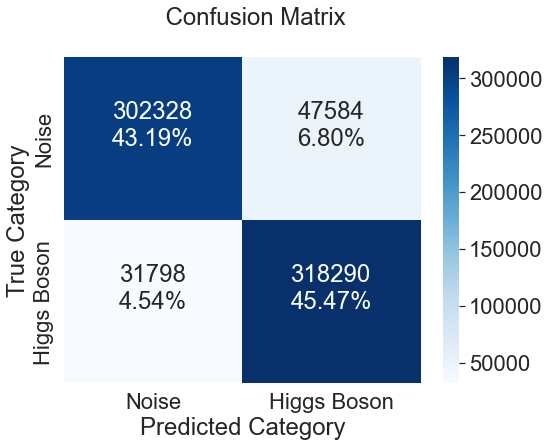

In [190]:
cm = confusion_matrix(test_labels,prediction_labels)
plot_confusion(cm)

In [191]:
from sklearn.metrics import classification_report
print(classification_report(test_labels,prediction_labels, 
                            target_names=['Noise','Higgs Boson'])) 

              precision    recall  f1-score   support

       Noise       0.90      0.86      0.88    349912
 Higgs Boson       0.87      0.91      0.89    350088

    accuracy                           0.89    700000
   macro avg       0.89      0.89      0.89    700000
weighted avg       0.89      0.89      0.89    700000



In [163]:
tb = TensorBoard(log_dir=f"logs\\{time()}")

callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    min_delta=0.0001,
    patience=3,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True
)


gelu_model = tf.keras.Sequential([
    tf.keras.layers.Dense(300, activation='gelu', input_shape=(28,)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(300, activation='gelu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(300, activation='gelu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(300, activation='gelu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(300, activation='gelu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2, activation='softmax')   
])

gelu_model.compile(optimizer=tf.optimizers.Adam(0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
gelu_model.fit(train_features_scaled, train_labels, batch_size=5000, epochs=100, callbacks=callback, validation_data=[validation_features_scaled, validation_labels])

test_loss, test_acc = gelu_model.evaluate(test_features_scaled,  test_labels, batch_size=5000, verbose=2)

print('\nTest accuracy:', test_acc)

Epoch 1/100


2022-03-27 16:33:16.005180: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1119/1120 [============================>.] - ETA: 0s - loss: 0.3103 - accuracy: 0.8545

2022-03-27 16:34:08.170848: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1120/1120 [==============================] - 54s 48ms/step - loss: 0.3103 - accuracy: 0.8545 - val_loss: 0.2853 - val_accuracy: 0.8681
Epoch 2/100
1120/1120 [==============================] - 51s 45ms/step - loss: 0.2911 - accuracy: 0.8660 - val_loss: 0.2801 - val_accuracy: 0.8724
Epoch 3/100
1120/1120 [==============================] - 50s 45ms/step - loss: 0.2863 - accuracy: 0.8691 - val_loss: 0.2761 - val_accuracy: 0.8750
Epoch 4/100
1120/1120 [==============================] - 51s 45ms/step - loss: 0.2831 - accuracy: 0.8711 - val_loss: 0.2726 - val_accuracy: 0.8765
Epoch 5/100
1120/1120 [==============================] - 50s 44ms/step - loss: 0.2810 - accuracy: 0.8724 - val_loss: 0.2715 - val_accuracy: 0.8776
Epoch 6/100
1120/1120 [==============================] - 49s 44ms/step - loss: 0.2794 - accuracy: 0.8733 - val_loss: 0.2712 - val_accuracy: 0.8779
Epoch 7/100
1120/1120 [==============================] - 49s 44ms/step - loss: 0.2784 - accuracy: 0.8740 - val_loss: 0.2746 - val_

In [164]:
tb = TensorBoard(log_dir=f"logs\\{time()}")

callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    min_delta=0.0001,
    patience=3,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True
)


gelu_model = tf.keras.Sequential([
    tf.keras.layers.Dense(300, activation='gelu', input_shape=(28,)),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(300, activation='gelu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(300, activation='gelu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(300, activation='gelu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(300, activation='gelu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(2, activation='softmax')   
])

gelu_model.compile(optimizer=tf.optimizers.Adam(0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
gelu_model.fit(train_features_scaled, train_labels, batch_size=5000, epochs=100, callbacks=callback, validation_data=[validation_features_scaled, validation_labels])

test_loss, test_acc = gelu_model.evaluate(test_features_scaled,  test_labels, batch_size=5000, verbose=2)

print('\nTest accuracy:', test_acc)

Epoch 1/100


2022-03-27 16:53:14.463354: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1119/1120 [============================>.] - ETA: 0s - loss: 0.2911 - accuracy: 0.8657

2022-03-27 16:54:02.420875: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1120/1120 [==============================] - 50s 44ms/step - loss: 0.2910 - accuracy: 0.8657 - val_loss: 0.2715 - val_accuracy: 0.8773
Epoch 2/100
1120/1120 [==============================] - 49s 44ms/step - loss: 0.2712 - accuracy: 0.8772 - val_loss: 0.2643 - val_accuracy: 0.8806
Epoch 3/100
1120/1120 [==============================] - 50s 45ms/step - loss: 0.2669 - accuracy: 0.8797 - val_loss: 0.2621 - val_accuracy: 0.8821
Epoch 4/100
1120/1120 [==============================] - 50s 45ms/step - loss: 0.2648 - accuracy: 0.8809 - val_loss: 0.2608 - val_accuracy: 0.8828
Epoch 5/100
1120/1120 [==============================] - 49s 44ms/step - loss: 0.2634 - accuracy: 0.8817 - val_loss: 0.2594 - val_accuracy: 0.8836
Epoch 6/100
1120/1120 [==============================] - 51s 46ms/step - loss: 0.2623 - accuracy: 0.8824 - val_loss: 0.2588 - val_accuracy: 0.8840
Epoch 7/100
1120/1120 [==============================] - 52s 46ms/step - loss: 0.2615 - accuracy: 0.8828 - val_loss: 0.2590 - val_

In [165]:
tb = TensorBoard(log_dir=f"logs\\{time()}")

callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    min_delta=0.0001,
    patience=3,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True
)


gelu_model = tf.keras.Sequential([
    tf.keras.layers.Dense(300, activation='gelu', input_shape=(28,)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(300, activation='gelu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(300, activation='gelu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(300, activation='gelu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(300, activation='gelu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(2, activation='softmax')   
])

gelu_model.compile(optimizer=tf.optimizers.Adam(0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
gelu_model.fit(train_features_scaled, train_labels, batch_size=5000, epochs=100, callbacks=callback, validation_data=[validation_features_scaled, validation_labels])

test_loss, test_acc = gelu_model.evaluate(test_features_scaled,  test_labels, batch_size=5000, verbose=2)

print('\nTest accuracy:', test_acc)

Epoch 1/100


2022-03-27 17:07:39.918259: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1119/1120 [============================>.] - ETA: 0s - loss: 0.3002 - accuracy: 0.8603

2022-03-27 17:08:29.531464: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1120/1120 [==============================] - 52s 45ms/step - loss: 0.3002 - accuracy: 0.8603 - val_loss: 0.2778 - val_accuracy: 0.8735
Epoch 2/100
1120/1120 [==============================] - 50s 45ms/step - loss: 0.2817 - accuracy: 0.8716 - val_loss: 0.2705 - val_accuracy: 0.8774
Epoch 3/100
1120/1120 [==============================] - 51s 45ms/step - loss: 0.2765 - accuracy: 0.8748 - val_loss: 0.2664 - val_accuracy: 0.8798
Epoch 4/100
1120/1120 [==============================] - 50s 45ms/step - loss: 0.2736 - accuracy: 0.8763 - val_loss: 0.2652 - val_accuracy: 0.8805
Epoch 5/100
1120/1120 [==============================] - 50s 45ms/step - loss: 0.2719 - accuracy: 0.8774 - val_loss: 0.2630 - val_accuracy: 0.8817
Epoch 6/100
1120/1120 [==============================] - 50s 45ms/step - loss: 0.2706 - accuracy: 0.8781 - val_loss: 0.2623 - val_accuracy: 0.8820
Epoch 7/100
1120/1120 [==============================] - 50s 45ms/step - loss: 0.2697 - accuracy: 0.8786 - val_loss: 0.2626 - val_

In [167]:
tb = TensorBoard(log_dir=f"logs\\{time()}")

callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    min_delta=0.0001,
    patience=3,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True
)


gelu_model = tf.keras.Sequential([
    tf.keras.layers.Dense(300, activation='gelu', input_shape=(28,)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(300, activation='gelu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(300, activation='gelu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(300, activation='gelu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(300, activation='gelu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(2, activation='softmax')   
])

gelu_model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

gelu_model.fit(train_features_scaled, train_labels, batch_size=5000, epochs=100, callbacks=callback, validation_data=[validation_features_scaled, validation_labels])

test_loss, test_acc = gelu_model.evaluate(test_features_scaled,  test_labels, batch_size=5000, verbose=2)

print('\nTest accuracy:', test_acc)

Epoch 1/100


2022-03-27 18:24:23.508881: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1120/1120 [==============================] - ETA: 0s - loss: 0.2982 - accuracy: 0.8615

2022-03-27 18:25:13.551580: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1120/1120 [==============================] - 52s 46ms/step - loss: 0.2982 - accuracy: 0.8615 - val_loss: 0.2767 - val_accuracy: 0.8746
Epoch 2/100
1120/1120 [==============================] - 51s 45ms/step - loss: 0.2789 - accuracy: 0.8732 - val_loss: 0.2682 - val_accuracy: 0.8786
Epoch 3/100
1120/1120 [==============================] - 50s 44ms/step - loss: 0.2739 - accuracy: 0.8761 - val_loss: 0.2650 - val_accuracy: 0.8805
Epoch 4/100
1120/1120 [==============================] - 50s 44ms/step - loss: 0.2717 - accuracy: 0.8774 - val_loss: 0.2645 - val_accuracy: 0.8811
Epoch 5/100
1120/1120 [==============================] - 50s 45ms/step - loss: 0.2700 - accuracy: 0.8783 - val_loss: 0.2622 - val_accuracy: 0.8821
Epoch 6/100
1120/1120 [==============================] - 51s 46ms/step - loss: 0.2687 - accuracy: 0.8791 - val_loss: 0.2614 - val_accuracy: 0.8824
Epoch 7/100
1120/1120 [==============================] - 51s 45ms/step - loss: 0.2679 - accuracy: 0.8796 - val_loss: 0.2612 - val_

In [168]:
tb = TensorBoard(log_dir=f"logs\\{time()}")

callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    min_delta=0.0001,
    patience=3,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True
)


gelu_model = tf.keras.Sequential([
    tf.keras.layers.Dense(300, activation='gelu', input_shape=(28,)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(300, activation='gelu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(300, activation='gelu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(300, activation='gelu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(300, activation='gelu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(2, activation='softmax')   
])

gelu_model.compile(optimizer=tf.optimizers.Adam(0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

gelu_model.fit(train_features_scaled, train_labels, batch_size=2000, epochs=100, callbacks=callback, validation_data=[validation_features_scaled, validation_labels])

test_loss, test_acc = gelu_model.evaluate(test_features_scaled,  test_labels, batch_size=2000, verbose=2)

print('\nTest accuracy:', test_acc)

Epoch 1/100


2022-03-27 18:46:23.699945: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2799/2800 [============================>.] - ETA: 0s - loss: 0.2884 - accuracy: 0.8674

2022-03-27 18:47:14.826977: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2800/2800 [==============================] - 54s 19ms/step - loss: 0.2884 - accuracy: 0.8674 - val_loss: 0.2700 - val_accuracy: 0.8783
Epoch 2/100
2800/2800 [==============================] - 56s 20ms/step - loss: 0.2733 - accuracy: 0.8765 - val_loss: 0.2649 - val_accuracy: 0.8805
Epoch 3/100
2800/2800 [==============================] - 56s 20ms/step - loss: 0.2695 - accuracy: 0.8787 - val_loss: 0.2637 - val_accuracy: 0.8820
Epoch 4/100
2800/2800 [==============================] - 56s 20ms/step - loss: 0.2677 - accuracy: 0.8797 - val_loss: 0.2613 - val_accuracy: 0.8827
Epoch 5/100
2800/2800 [==============================] - 56s 20ms/step - loss: 0.2664 - accuracy: 0.8803 - val_loss: 0.2619 - val_accuracy: 0.8823
Epoch 6/100
2800/2800 [==============================] - 57s 20ms/step - loss: 0.2654 - accuracy: 0.8810 - val_loss: 0.2595 - val_accuracy: 0.8837
Epoch 7/100
2800/2800 [==============================] - 57s 20ms/step - loss: 0.2647 - accuracy: 0.8814 - val_loss: 0.2593 - val_

In [169]:
tb = TensorBoard(log_dir=f"logs\\{time()}")

callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    min_delta=0.0001,
    patience=3,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True
)


gelu_model = tf.keras.Sequential([
    tf.keras.layers.Dense(300, activation='gelu', input_shape=(28,)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(300, activation='gelu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(300, activation='gelu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(300, activation='gelu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(300, activation='gelu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(2, activation='softmax')   
])

gelu_model.compile(optimizer=tf.optimizers.Adam(0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
gelu_model.fit(train_features_scaled, train_labels, batch_size=10000, epochs=100, callbacks=callback, validation_data=[validation_features_scaled, validation_labels])

test_loss, test_acc = gelu_model.evaluate(test_features_scaled,  test_labels, batch_size=10000, verbose=2)

print('\nTest accuracy:', test_acc)

Epoch 1/100


2022-03-27 19:04:25.587134: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


560/560 [==============================] - ETA: 0s - loss: 0.3036 - accuracy: 0.8585

2022-03-27 19:05:16.520508: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


560/560 [==============================] - 53s 93ms/step - loss: 0.3036 - accuracy: 0.8585 - val_loss: 0.2801 - val_accuracy: 0.8718
Epoch 2/100
560/560 [==============================] - 48s 86ms/step - loss: 0.2808 - accuracy: 0.8716 - val_loss: 0.2696 - val_accuracy: 0.8779
Epoch 3/100
560/560 [==============================] - 49s 88ms/step - loss: 0.2747 - accuracy: 0.8753 - val_loss: 0.2667 - val_accuracy: 0.8799
Epoch 4/100
560/560 [==============================] - 48s 86ms/step - loss: 0.2713 - accuracy: 0.8773 - val_loss: 0.2634 - val_accuracy: 0.8812
Epoch 5/100
560/560 [==============================] - 48s 86ms/step - loss: 0.2694 - accuracy: 0.8783 - val_loss: 0.2623 - val_accuracy: 0.8819
Epoch 6/100
560/560 [==============================] - 48s 86ms/step - loss: 0.2682 - accuracy: 0.8791 - val_loss: 0.2611 - val_accuracy: 0.8826
Epoch 7/100
560/560 [==============================] - 48s 86ms/step - loss: 0.2670 - accuracy: 0.8798 - val_loss: 0.2603 - val_accuracy: 0.88

In [171]:
tb = TensorBoard(log_dir=f"logs\\{time()}")

callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    min_delta=0.0001,
    patience=3,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True
)


gelu_model = tf.keras.Sequential([
    tf.keras.layers.Dense(300, activation='gelu', input_shape=(28,)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(300, activation='gelu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(300, activation='gelu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(300, activation='gelu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(300, activation='gelu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(2, activation='softmax')   
])

gelu_model.compile(optimizer=tf.optimizers.Adam(0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
gelu_model.fit(train_features_scaled, train_labels, batch_size=250, epochs=100, callbacks=callback, validation_data=[validation_features_scaled, validation_labels])

test_loss, test_acc = gelu_model.evaluate(test_features_scaled,  test_labels, batch_size=250, verbose=2)

print('\nTest accuracy:', test_acc)

Epoch 1/100


2022-03-27 19:42:50.560637: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


22398/22400 [============================>.] - ETA: 0s - loss: 0.2823 - accuracy: 0.8717

2022-03-27 19:46:03.881275: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


22400/22400 [==============================] - 202s 9ms/step - loss: 0.2823 - accuracy: 0.8717 - val_loss: 0.2679 - val_accuracy: 0.8793
Epoch 2/100
22400/22400 [==============================] - 199s 9ms/step - loss: 0.2713 - accuracy: 0.8780 - val_loss: 0.2655 - val_accuracy: 0.8809
Epoch 3/100
22400/22400 [==============================] - 195s 9ms/step - loss: 0.2689 - accuracy: 0.8793 - val_loss: 0.2622 - val_accuracy: 0.8823
Epoch 4/100
22400/22400 [==============================] - 201s 9ms/step - loss: 0.2678 - accuracy: 0.8800 - val_loss: 0.2626 - val_accuracy: 0.8830
Epoch 5/100
22400/22400 [==============================] - 200s 9ms/step - loss: 0.2667 - accuracy: 0.8806 - val_loss: 0.2610 - val_accuracy: 0.8831
Epoch 6/100
22400/22400 [==============================] - 201s 9ms/step - loss: 0.2663 - accuracy: 0.8808 - val_loss: 0.2636 - val_accuracy: 0.8826
Epoch 7/100
22400/22400 [==============================] - 218s 10ms/step - loss: 0.2658 - accuracy: 0.8810 - val_loss

In [172]:
tb = TensorBoard(log_dir=f"logs\\{time()}")

callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    min_delta=0.0001,
    patience=3,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True
)


gelu_model = tf.keras.Sequential([
    tf.keras.layers.Dense(300, activation='gelu', input_shape=(28,)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(300, activation='gelu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(300, activation='gelu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(300, activation='gelu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(300, activation='gelu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(2, activation='softmax')   
])

gelu_model.compile(optimizer=tf.optimizers.Adam(0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
gelu_model.fit(train_features_scaled, train_labels, batch_size=64, epochs=100, callbacks=callback, validation_data=[validation_features_scaled, validation_labels])

test_loss, test_acc = gelu_model.evaluate(test_features_scaled,  test_labels, batch_size=64, verbose=2)

print('\nTest accuracy:', test_acc)

Epoch 1/100


2022-03-27 20:53:51.208028: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


87499/87500 [============================>.] - ETA: 0s - loss: 0.2820 - accuracy: 0.8721

2022-03-27 21:05:59.108029: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


87500/87500 [==============================] - 765s 9ms/step - loss: 0.2820 - accuracy: 0.8721 - val_loss: 0.2825 - val_accuracy: 0.8773
Epoch 2/100
87500/87500 [==============================] - 782s 9ms/step - loss: 0.2754 - accuracy: 0.8774 - val_loss: 0.2725 - val_accuracy: 0.8780
Epoch 3/100
87500/87500 [==============================] - 788s 9ms/step - loss: 0.2729 - accuracy: 0.8783 - val_loss: 0.2690 - val_accuracy: 0.8808
Epoch 4/100
87500/87500 [==============================] - 794s 9ms/step - loss: 0.2705 - accuracy: 0.8788 - val_loss: 0.2713 - val_accuracy: 0.8789
Epoch 5/100
87500/87500 [==============================] - 782s 9ms/step - loss: 0.2708 - accuracy: 0.8788 - val_loss: 0.3048 - val_accuracy: 0.8770
Epoch 6/100
87500/87500 [==============================] - 796s 9ms/step - loss: 0.2715 - accuracy: 0.8788 - val_loss: 0.2764 - val_accuracy: 0.8786
10938/10938 - 42s - loss: 0.2684 - accuracy: 0.8809 - 42s/epoch - 4ms/step

Test accuracy: 0.8809428215026855


In [173]:
tb = TensorBoard(log_dir=f"logs\\{time()}")

callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    min_delta=0.0001,
    patience=3,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True
)


gelu_model = tf.keras.Sequential([
    tf.keras.layers.Dense(300, activation='gelu', input_shape=(28,)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(300, activation='gelu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(300, activation='gelu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(300, activation='gelu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(300, activation='gelu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(2, activation='softmax')   
])

gelu_model.compile(optimizer=tf.optimizers.Adam(0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
gelu_model.fit(train_features_scaled, train_labels, batch_size=32, epochs=100, callbacks=callback, validation_data=[validation_features_scaled, validation_labels])

test_loss, test_acc = gelu_model.evaluate(test_features_scaled,  test_labels, batch_size=32, verbose=2)

print('\nTest accuracy:', test_acc)

Epoch 1/100


2022-03-27 22:13:03.685208: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


174995/175000 [============================>.] - ETA: 0s - loss: 0.2840 - accuracy: 0.8714

2022-03-27 22:37:25.998028: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


175000/175000 [==============================] - 1530s 9ms/step - loss: 0.2840 - accuracy: 0.8714 - val_loss: 0.2954 - val_accuracy: 0.8720
Epoch 2/100
175000/175000 [==============================] - 1493s 9ms/step - loss: 0.2747 - accuracy: 0.8765 - val_loss: 0.3151 - val_accuracy: 0.8685
Epoch 3/100
175000/175000 [==============================] - 1432s 8ms/step - loss: 0.2756 - accuracy: 0.8766 - val_loss: 0.3013 - val_accuracy: 0.8784
Epoch 4/100
175000/175000 [==============================] - 1475s 8ms/step - loss: 0.2802 - accuracy: 0.8739 - val_loss: 0.2924 - val_accuracy: 0.8757
Epoch 5/100
175000/175000 [==============================] - 1489s 9ms/step - loss: 0.2876 - accuracy: 0.8721 - val_loss: 0.3162 - val_accuracy: 0.8658
Epoch 6/100
175000/175000 [==============================] - 1508s 9ms/step - loss: 0.2869 - accuracy: 0.8736 - val_loss: 0.3496 - val_accuracy: 0.8393
21875/21875 - 62s - loss: 0.3008 - accuracy: 0.8787 - 62s/epoch - 3ms/step

Test accuracy: 0.8787485

In [174]:
tb = TensorBoard(log_dir=f"logs\\{time()}")

callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    min_delta=0.0001,
    patience=3,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True
)


gelu_model = tf.keras.Sequential([
    tf.keras.layers.Dense(300, activation='gelu', input_shape=(28,)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(300, activation='gelu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(300, activation='gelu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(300, activation='gelu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(300, activation='gelu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(2, activation='softmax')   
])

gelu_model.compile(optimizer=tf.optimizers.Adam(0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
gelu_model.fit(train_features_scaled, train_labels, batch_size=4000, epochs=100, callbacks=callback, validation_data=[validation_features_scaled, validation_labels])

test_loss, test_acc = gelu_model.evaluate(test_features_scaled,  test_labels, batch_size=4000, verbose=2)

print('\nTest accuracy:', test_acc)

Epoch 1/100


2022-03-28 00:46:29.618047: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1400/1400 [==============================] - ETA: 0s - loss: 0.2937 - accuracy: 0.8641

2022-03-28 00:47:22.277406: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1400/1400 [==============================] - 55s 38ms/step - loss: 0.2937 - accuracy: 0.8641 - val_loss: 0.2743 - val_accuracy: 0.8762
Epoch 2/100
1400/1400 [==============================] - 53s 38ms/step - loss: 0.2757 - accuracy: 0.8749 - val_loss: 0.2662 - val_accuracy: 0.8797
Epoch 3/100
1400/1400 [==============================] - 52s 37ms/step - loss: 0.2710 - accuracy: 0.8777 - val_loss: 0.2641 - val_accuracy: 0.8810
Epoch 4/100
1400/1400 [==============================] - 51s 37ms/step - loss: 0.2687 - accuracy: 0.8789 - val_loss: 0.2628 - val_accuracy: 0.8817
Epoch 5/100
1400/1400 [==============================] - 52s 37ms/step - loss: 0.2672 - accuracy: 0.8798 - val_loss: 0.2609 - val_accuracy: 0.8830
Epoch 6/100
1400/1400 [==============================] - 54s 39ms/step - loss: 0.2662 - accuracy: 0.8804 - val_loss: 0.2605 - val_accuracy: 0.8833
Epoch 7/100
1400/1400 [==============================] - 53s 38ms/step - loss: 0.2653 - accuracy: 0.8810 - val_loss: 0.2599 - val_

In [175]:
tb = TensorBoard(log_dir=f"logs\\{time()}")

callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    min_delta=0.0001,
    patience=3,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True
)


gelu_model = tf.keras.Sequential([
    tf.keras.layers.Dense(300, activation='gelu', input_shape=(28,)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(300, activation='gelu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(300, activation='gelu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(300, activation='gelu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(300, activation='gelu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(2, activation='softmax')   
])

gelu_model.compile(optimizer=tf.optimizers.Adam(0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
gelu_model.fit(train_features_scaled, train_labels, batch_size=6000, epochs=100, callbacks=callback, validation_data=[validation_features_scaled, validation_labels])

test_loss, test_acc = gelu_model.evaluate(test_features_scaled,  test_labels, batch_size=6000, verbose=2)

print('\nTest accuracy:', test_acc)

Epoch 1/100


2022-03-28 01:09:10.166555: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


934/934 [==============================] - ETA: 0s - loss: 0.2979 - accuracy: 0.8617

2022-03-28 01:10:02.574221: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


934/934 [==============================] - 55s 57ms/step - loss: 0.2979 - accuracy: 0.8617 - val_loss: 0.2759 - val_accuracy: 0.8746
Epoch 2/100
934/934 [==============================] - 52s 56ms/step - loss: 0.2780 - accuracy: 0.8734 - val_loss: 0.2685 - val_accuracy: 0.8785
Epoch 3/100
934/934 [==============================] - 52s 56ms/step - loss: 0.2729 - accuracy: 0.8765 - val_loss: 0.2647 - val_accuracy: 0.8807
Epoch 4/100
934/934 [==============================] - 52s 56ms/step - loss: 0.2701 - accuracy: 0.8781 - val_loss: 0.2636 - val_accuracy: 0.8816
Epoch 5/100
934/934 [==============================] - 53s 56ms/step - loss: 0.2682 - accuracy: 0.8793 - val_loss: 0.2610 - val_accuracy: 0.8826
Epoch 6/100
934/934 [==============================] - 53s 56ms/step - loss: 0.2668 - accuracy: 0.8799 - val_loss: 0.2606 - val_accuracy: 0.8829
Epoch 7/100
934/934 [==============================] - 52s 56ms/step - loss: 0.2659 - accuracy: 0.8804 - val_loss: 0.2609 - val_accuracy: 0.88